#  Chapter 5: Probability Distributions

__Probability__ takes on a value from 0 to 1, with a probability $P(X) = 0$ for an event meaning that the stated condition - e.g., a standard 6 sided die will yield a 7 when rolled -  would never occur in an infinite number of flips. A probability of 0.5 means that in a sufficiently large number of trials, approximately half of the trials would result in the stated condition. A probability of 1 means all trials would result in the stated condition so that the number of successes in a trial would be equal to the number of attempts. 

__Probability Distributions__ display all of the possible values that a _random variable_ $X$ could take on on the x-axis, and the corresponding probability of that value on the y-axis. Hence, the area under the probability distribution will always be equal to one. 
   - The random variable $\bar{X}$, which represents the the mean of a sample drawn from a larger population, defines a _**sampling distribution**_, which gives all values possible for $\bar{X}$, $\bar{X_i}$, and the probability of that value occuring. $\bar{X}$ can take on values falling on its sampling distribution, which describe the likelihood of getting a given mean for a given sample size.  This sampling distribution takes on a standard deviation of $\frac{S}{\sqrt(n)}$, otherwise known as the **standard error.** 

Distributions can be described by: 
- Their mean, $\mu$(or $\bar{X}$ for sampling distributions), which is the average value of the dataset.  
- Their standard deviation, $\sigma$, which determines how flat the curve is, and how densely the data clusters around the mean(SE for sampling distributions).
- Skewness, $S_{KP}$, which refers to a distortion or asymmetry of a distribution. 
- Kurtosis, $k$, which describes how much of the distribution lays in its tails.

### Types of Probability Distributions
#### Normal Distributions
Normal Distribution, also known as Gaussian distribution, is ubiquitous in Data Science and often used when modeling economic phenomena. You will encounter it in predictive models you create. It is one of the assumptions of many statistical techniques.

A normal distribution has a bell-shaped density curve described by its mean $\mu$ and standard deviation $\sigma$. The density curve is symmetrical(skewness of 0), centered about its mean, with its spread determined by its standard deviation. Data near the mean - e.g., $\sigma < 1$ - are more frequent in occurrence than data far from the mean - e.g., $\sigma > 2$. 


A random variable $X$ which follows a normal distribution with mean $\mu$ and standard deviation $\sigma$ and has this density function: 
<h3 align="center">
    <font size="4">
        $ X = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} $
    </font>
    </h3> 
    
If one knew the mean and standard deviation of a particular distribution, it would be possible to estimate the probability of drawing a value from a particular range - e.g., $a \leq X \leq b$ - by taking the definite integral of this function: 
<h3 align="center">
    <font size="4">
        $\int_{a}^{b}\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}dx$.
    </font>
</h3>

#### Standard Normal Distribution

The standardized normal distribution is the most important member of the family of normal probability distributions—the one with $\mu = 0$  and $\sigma = 1$. The normal random variable distributed according to the standard normal distribution is called the standard normal variable and is denoted by $Z$. It represents the number of standard deviations a given point X lies from the mean of the standard normal distribution.  It is expressed as
<h3 align="center">
    <font size="4">
        $ Z =  \frac{X-\mu}{\sigma}$
    </h3> 

A key feature of all normal distributions is that, using the equation above, they can be transformed to be analyzed using the standard normal distribution.
    
_If you divide any normal distribution by its standard deviation(normalizing the SD to be 1), that normal distribution becomes the standard normal distribution._

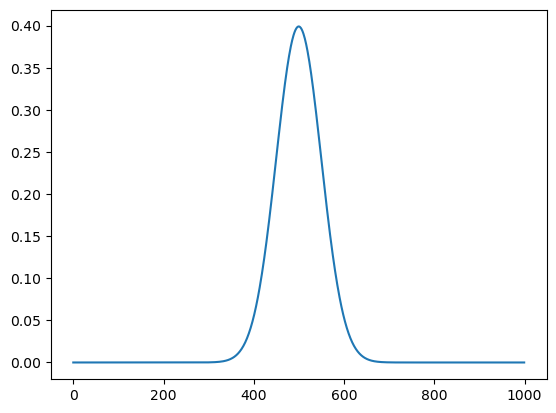

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from stats import *

# takes a list of x values in a given range with some number of finite
# divisions, will creata  wy value that correlates with each x value
# that was passed
def normal_dist(mean, sd, x = np.linspace(-10, 10, 1000)):
    prob_density = 1 / (sd * (2 * np.pi) ** 0.5) * np.exp(
        -0.5 * ((x - mean) / sd) ** 2)
    
    return prob_density
                        
normal_dist_list = normal_dist(mean = 0, sd = 1)
plt.plot(normal_dist_list)

Text(0.5, 1.0, '$\\mu$ = 0\t$\\mu_0$ = 0 $\\mu_1$ = 0 $\\mu_2$ = 0 ')

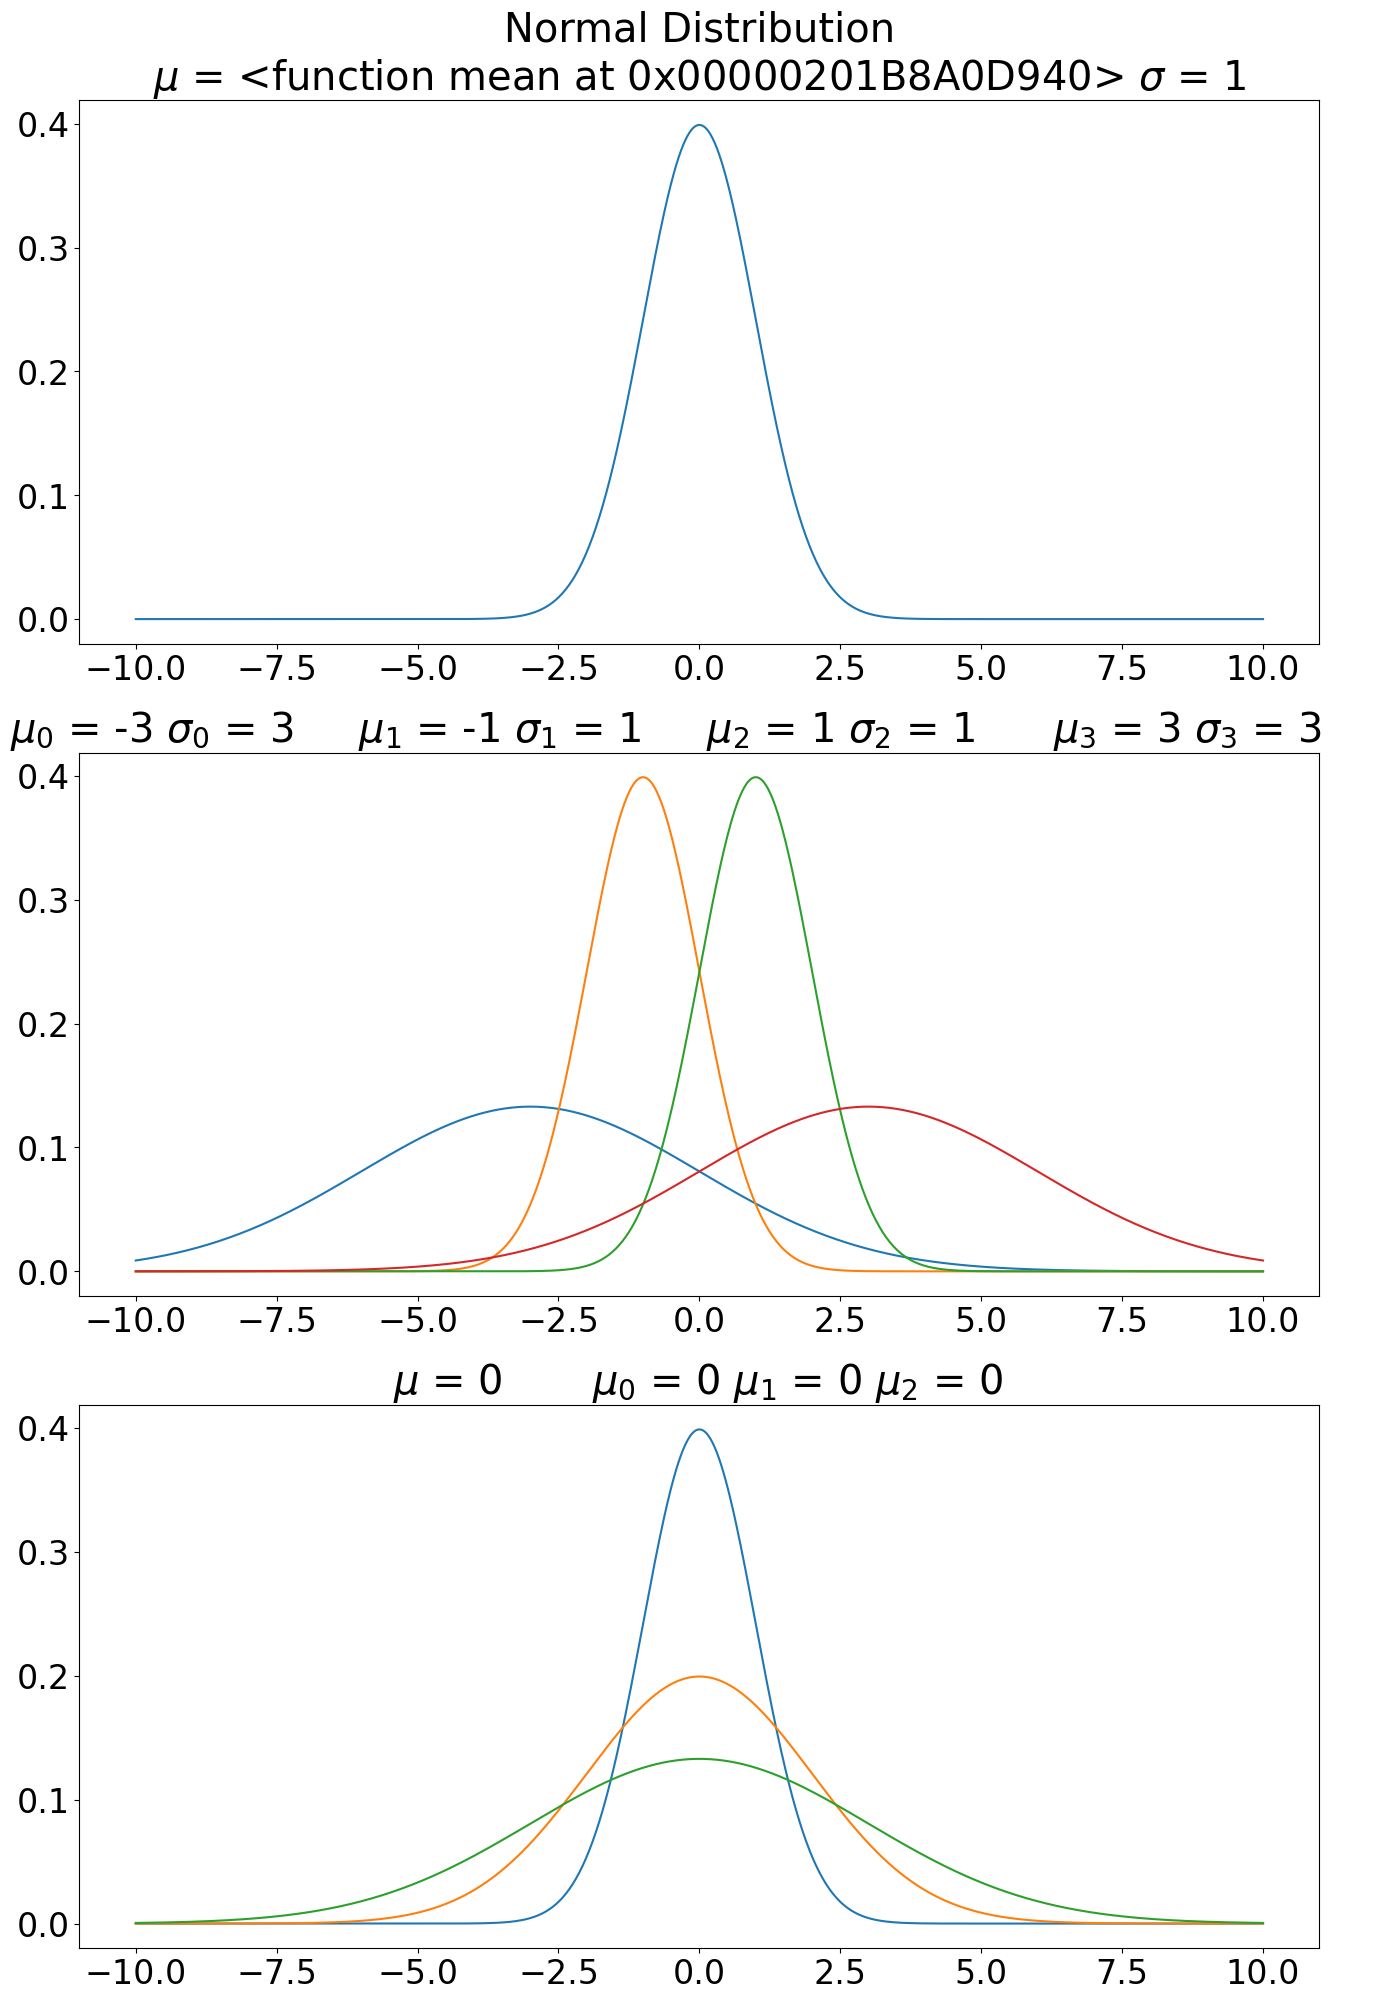

In [2]:
plt.rcParams.update({"font.size":24})
fig, axs = plt.subplots(3, 1, figsize = (16, 24))
x = np.linspace(-10, 10, 1000)

# perform transformation
mean_, sd = 0, 1
normal_dist_list = normal_dist(mean = mean_, sd = sd)
axs[0].plot(x, normal_dist_list)
axs[0].set_title("Normal Distribution\n$\mu$ = " + \
            str(mean) + " $\sigma$ = " + str(sd))

ax1_title = ""
ax1_sub = 0
for mean_ in range(-3, 4, 2):
    sd = abs(mean_)
    normal_dist_list = normal_dist(mean = mean_, sd = sd)
    axs[1].plot(x, normal_dist_list)
    ax1_title = ax1_title + "$\mu_" + str(ax1_sub) + "$ = " + str(mean_) + " "
    ax1_title = ax1_title + "$\sigma_" + str(ax1_sub) + "$ = " + str(sd) + "\t"
    ax1_sub +=1
axs[1].set_title(ax1_title)

ax2_title = "$\mu$ = 0\t"
ax2_sub = 0
for sd in range(1, 4):
    mean_ = 0
    normal_dist_list = normal_dist(mean = mean_, sd = sd)
    axs[2].plot(x, normal_dist_list)
    ax2_title = ax2_title + "$\mu_" + str(ax2_sub) + "$ = " + str(mean_) + " "
    ax2_sub +=1
axs[2].set_title(ax2_title)

## Lognormal Distribution

A random variable $X$ is said to have a lognormal distribution if $Y = ln(X)$ is normally distributed, where $ln$ denotes the natural logarithm.

In other words, $X$ is log-normally distributed if the natural logarithm of $X$ is normally distributed with mean $\mu$  and variance $\sigma ^2$:

$ln(X) = N(\mu, \sigma^2)$

The lognormal distribution is positively skewed with many small values and just a few large values. Consequently, the mean is greater than the mode in most cases.
Since the lognormal distribution is bound by zero on the lower side, it is perfect for modeling asset prices that cannot take negative values. On the other hand, the normal distribution cannot be used for the same purpose because it has a negative side.

When the returns on a stock (continuously compounded) follow a normal distribution(as shown above), the stock prices follow a lognormal distribution. Note that even if returns do not follow a normal distribution, the lognormal distribution is still the most appropriate model for stock prices.

The probability density function of the distribution is:
<h3 align="center">
    <font size="4">
        $f(x) = \frac{1}{x\sigma\sqrt{2\pi}}e^{\frac{- (lnx-\mu)^2}{2\sigma^2}}$
    </font>
    </h3> 


In [3]:
import warnings
warnings.filterwarnings("ignore")

def create_lognormal(mean, sd, x = np.linspace(0,10,1000)):
    density_points = (1 / x * sd * np.sqrt(2 * np.pi)) * np.e **(
        -(np.log(x) - mean) ** 2 / (2 * sd ** 2))
    return density_points

x = np.linspace(0,10,10000)
mean, sd = 1, 1
log_norm = create_lognormal(mean = mean, sd = sd, x = x)
log_norm

array([           nan, 6.61621771e-11, 6.24729736e-09, ...,
       1.07361897e-01, 1.07337175e-01, 1.07312459e-01])

Text(0.5, 1.0, 'Lognormal Distribution with μ = 1 and σ = 1')

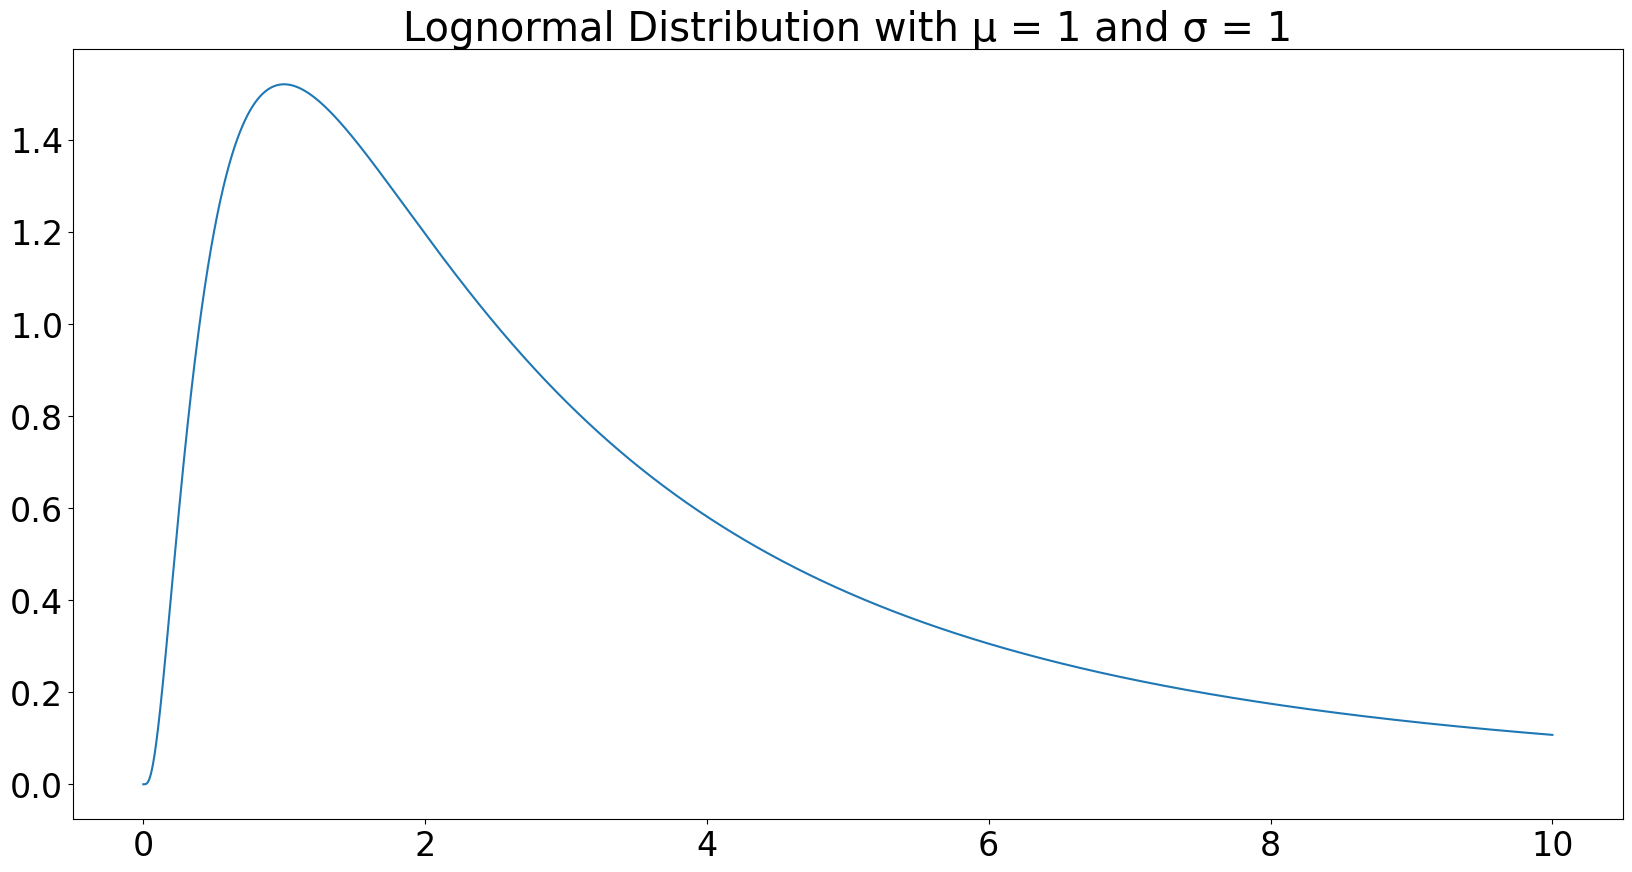

In [4]:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(x, log_norm)
ax.set_title(
    "Lognormal Distribution with μ = " + str(mean) + " and σ = " + str(sd))

Text(0.5, 1.0, 'Lognormal Distribution with μ = 1 and σ = 1')

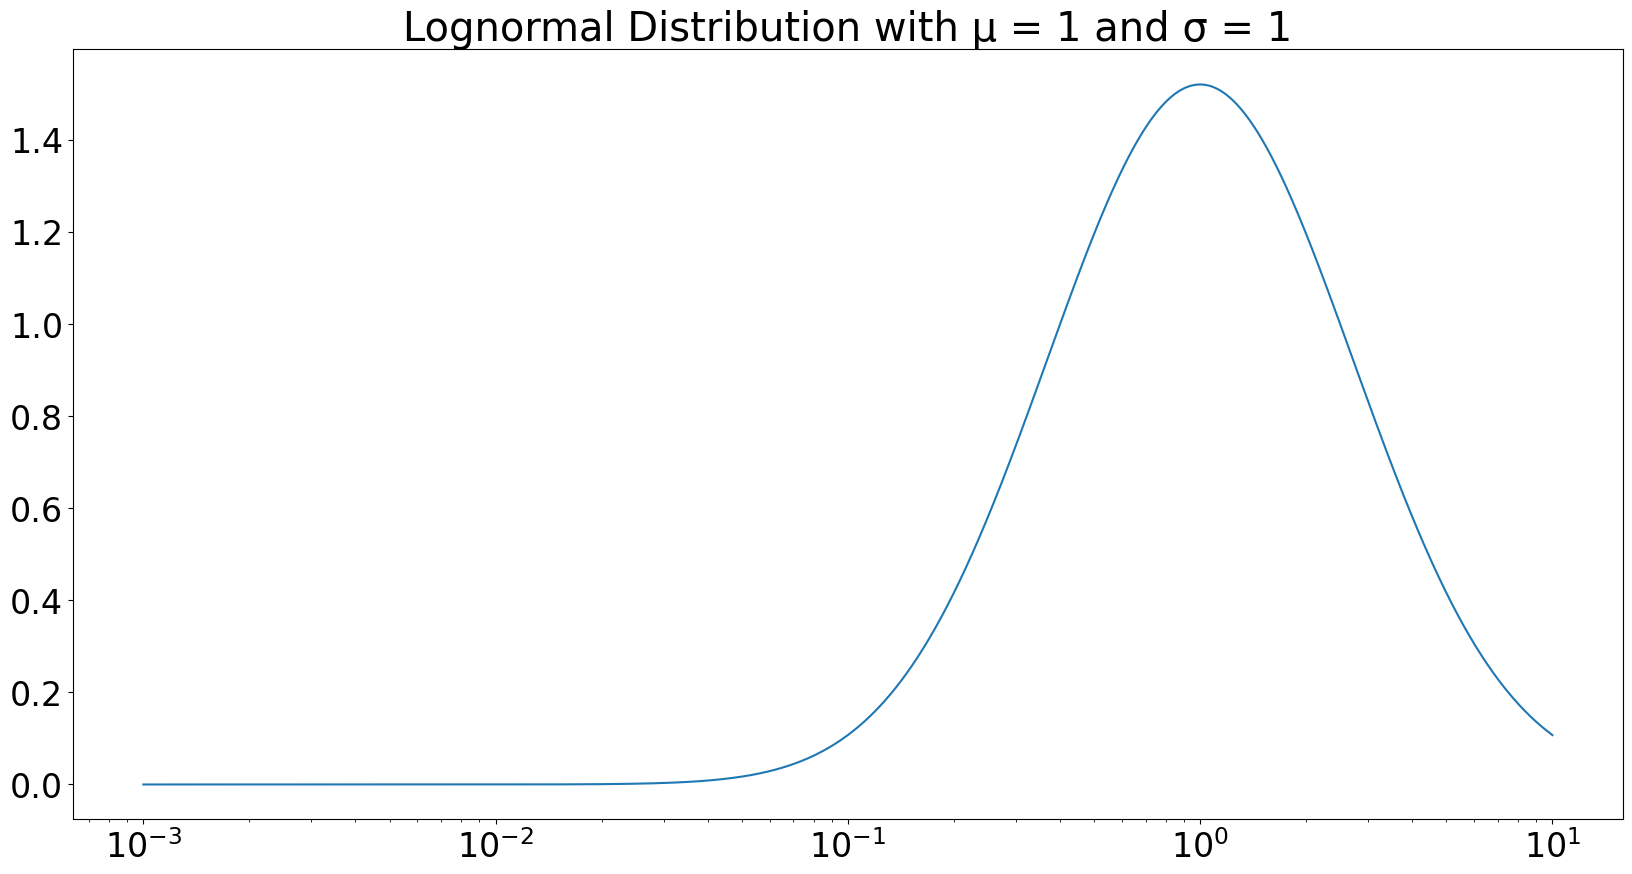

In [5]:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(x, log_norm)
plt.xscale("log")
ax.set_title(
    "Lognormal Distribution with μ = " + str(mean) + " and σ = " + str(sd))

### Binomial Distribution
If $X$ is a random variable that yields the number of successess seen in the trials of a binomial(yes or no) experiment, then we say that $X$ follows a binomial distribution.

We are interested in finding the probability that some particular number of successes is seen in the course of that binomial experiment.

- $n$ = the number of trials
- $x$ = some number of successes, with $0≤x≤n$
- $p$ = the probability of success on any one trial
- $q$ = $1−p$ = the probability of failure on any one trial

A binomial trial can result in a success with probability $p$ and a failure with probability $q = 1−p$. Then the probability distribution of the binomial random variable $X$, the number of successes in $n$ independent trials, is
<h3 align="center">
    <font size="4">
        $b(x; n, p) = {n \choose x}p^xq^{n-x}$
    </font>
    </h3> 

Where  $x = 0, 1, 2,..., n$ and ${n \choose x}=\frac{n!}{x!(n-x)!}$

The most common example is flipping a coin, which can be modeled as $x=$ the number of "heads" or "tails" in $n$ trials. The probability of success and failure is 0.5. 

The mean $\mu$ and standard deviation $\sigma$ for a binomial distribution $b(x; n, p)$ are
- $\mu = np$
- $\sigma = \sqrt{np(1-p)}$

We define and graph the binomial distribution for various x, p, and n values. 

As an example of the binomial distribution, we can think of the top hedge funds in the stock market. If we assume that the markets are efficient and any given mutual fund only has a 50% probability of beating the market in every year, if there is a large $n$, or a large number of firms, many of them will survive for many years, just by chance. This example is demonstrated wonderfully in Burton Malkiel's *A Random Walk Down Wallstreet* in which he describes a coin flipping contest of 1000 people, which guarantees that multiple people will win more than 10 rounds simply by chance, and then become world-renouned as amazing coin-flippers. 

- How many funds will 'beat' an efficient market for more than 10 years if there are 1000 funds to start? We will find the probability of a single fund beating the market for that long and then multiply that by 1000 funds. 

- $ = P(1) = {10 \choose 1}0.5^{1}0.5^{10-1} = 0.0097$, so there is a 0.97% chance of a single fund beating an efficient market for 10 years, and we can reasonably expect that 97 funds will beat the market for 10 years if 100 start, just by chance.

In [6]:
def binomial(x, n, p):
    q = 1 - p
    return float(math.factorial(n)) / (
        math.factorial(x) * math.factorial(n-x)) * p ** x * q ** (n - x)
binomial(x = 50, n = 100, p = 0.5)    

0.07958923738717875

In [7]:
# probability of generating a total between x0 and x1 for a given p, n

p, n = 0.5, 100
x0 = 45
x1 = 65

def probability_of_outcome(x0, x1, p, n):
    P = 0
    for x in range(x0, x1 + 1):
        P += binomial(x = x, n = n, p = p)
    return P

probability_of_outcome(x0, x1, p, n)

0.8634785227673393

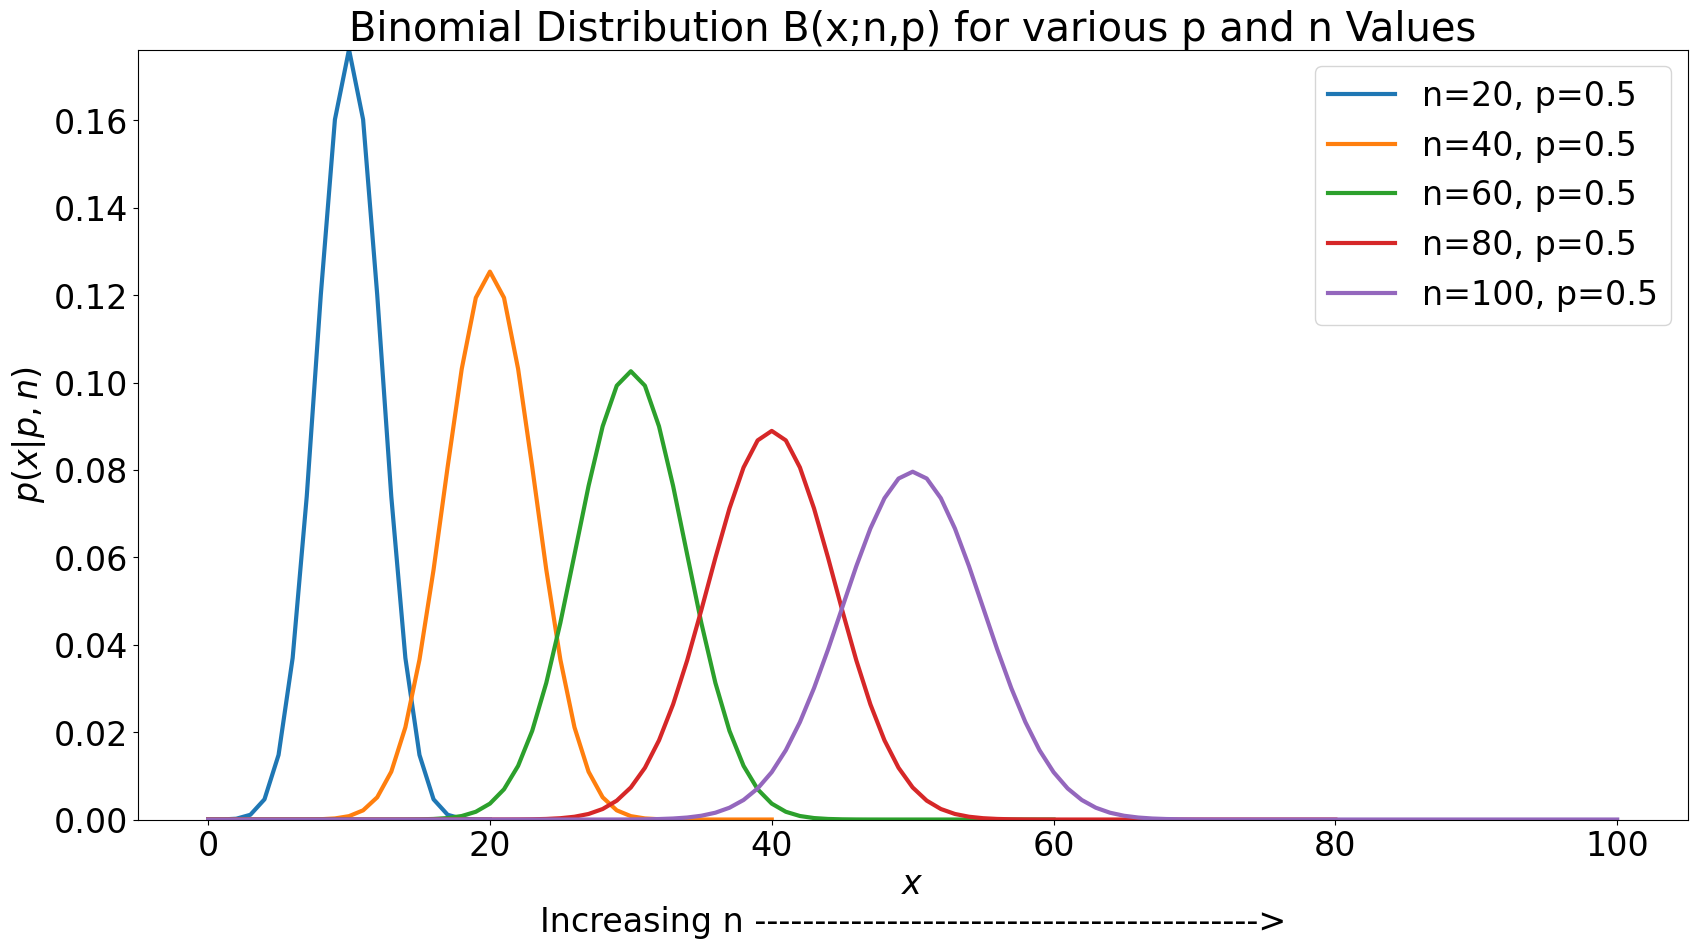

In [8]:
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize

fig, ax = plt.subplots(figsize = (20,10))
cmap = cm.get_cmap("Blues")
ymax = binomial(20 * p, 20, p)
for n in range(20, 101, 20):
#    x = int(n * p)
    # make a list of probability of every possible outcomes from 0 to n
    binom_vars = [binomial(x, n, p) for x in range(n + 1)]
    # plot_line that is composed of all probabilities
    plt.plot(binom_vars,
            linewidth = 3,
            label=f"n={n}, p={p}")
    # change max y axis value from 1 to something closer to the maximum
    # probability across all range from 0 to n for which we constructed
    # distribution
ax.set_ylim(ymin = 0, ymax = ymax)

plt.xlabel("$x$\nIncreasing n ------------------------------------------>",
           fontsize=24)
plt.ylabel("$p(x | p, n)$", fontsize=24)
plt.title("Binomial Distribution B(x;n,p) for various p and n Values")
plt.legend()

In [9]:
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import datetime

In [10]:
yf.pdr_override()
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.today()

data_dict = {}
stocks = ["MSFT", "AAPL", "PG", "TSLA"]
for stock in stocks:
    data_dict[stock] = web.get_data_yahoo(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [11]:
data_dict["MSFT"]

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   26.549999   26.959999   26.389999   26.770000   21.413071   
2012-01-04   26.820000   27.469999   26.780001   27.400000   21.916994   
2012-01-05   27.379999   27.730000   27.290001   27.680000   22.140963   
2012-01-06   27.530001   28.190001   27.530001   28.110001   22.484917   
2012-01-09   28.049999   28.100000   27.719999   27.740000   22.188955   
...                ...         ...         ...         ...         ...   
2023-03-22  273.399994  281.040009  272.179993  272.290009  272.290009   
2023-03-23  277.940002  281.059998  275.200012  277.660004  277.660004   
2023-03-24  277.239990  280.630005  275.279999  280.570007  280.570007   
2023-03-27  280.500000  281.459991  275.519989  276.380005  276.380005   
2023-03-28  275.790009  276.130005  272.049988  275.230011  275.230011   

              Volume  
Date                  
2012-01-03  64731500  
2012-01-04  80516100  
2012-01-05  56081400  
2012-01-06  99455500  
2012-01-09  59706800  
...              ...  
2023-03-22  34873300  
2023-03-23  36610900  
2023-03-24  28172000  
2023-03-27  26840200  
2023-03-28  21829989  

[2827 rows x 6 columns]

### Create a dataframe for the close data fo all four stocks

In [12]:
close_data = pd.concat([df["Close"] for df in data_dict.values()],
                      keys = data_dict.keys(),
                      axis = 1)
close_data

MSFT        AAPL          PG        TSLA
Date                                                      
2012-01-03   26.770000   14.686786   66.830002    1.872000
2012-01-04   27.400000   14.765714   66.800003    1.847333
2012-01-05   27.680000   14.929643   66.519997    1.808000
2012-01-06   28.110001   15.085714   66.360001    1.794000
2012-01-09   27.740000   15.061786   66.639999    1.816667
...                ...         ...         ...         ...
2023-03-22  272.290009  157.830002  143.990005  191.149994
2023-03-23  277.660004  158.929993  143.789993  192.220001
2023-03-24  280.570007  160.250000  146.720001  190.410004
2023-03-27  276.380005  158.279999  145.949997  191.809998
2023-03-28  275.230011  157.649994  146.360001  189.190002

[2827 rows x 4 columns]

Text(0.5, 1.0, 'Daily Stock Prices')

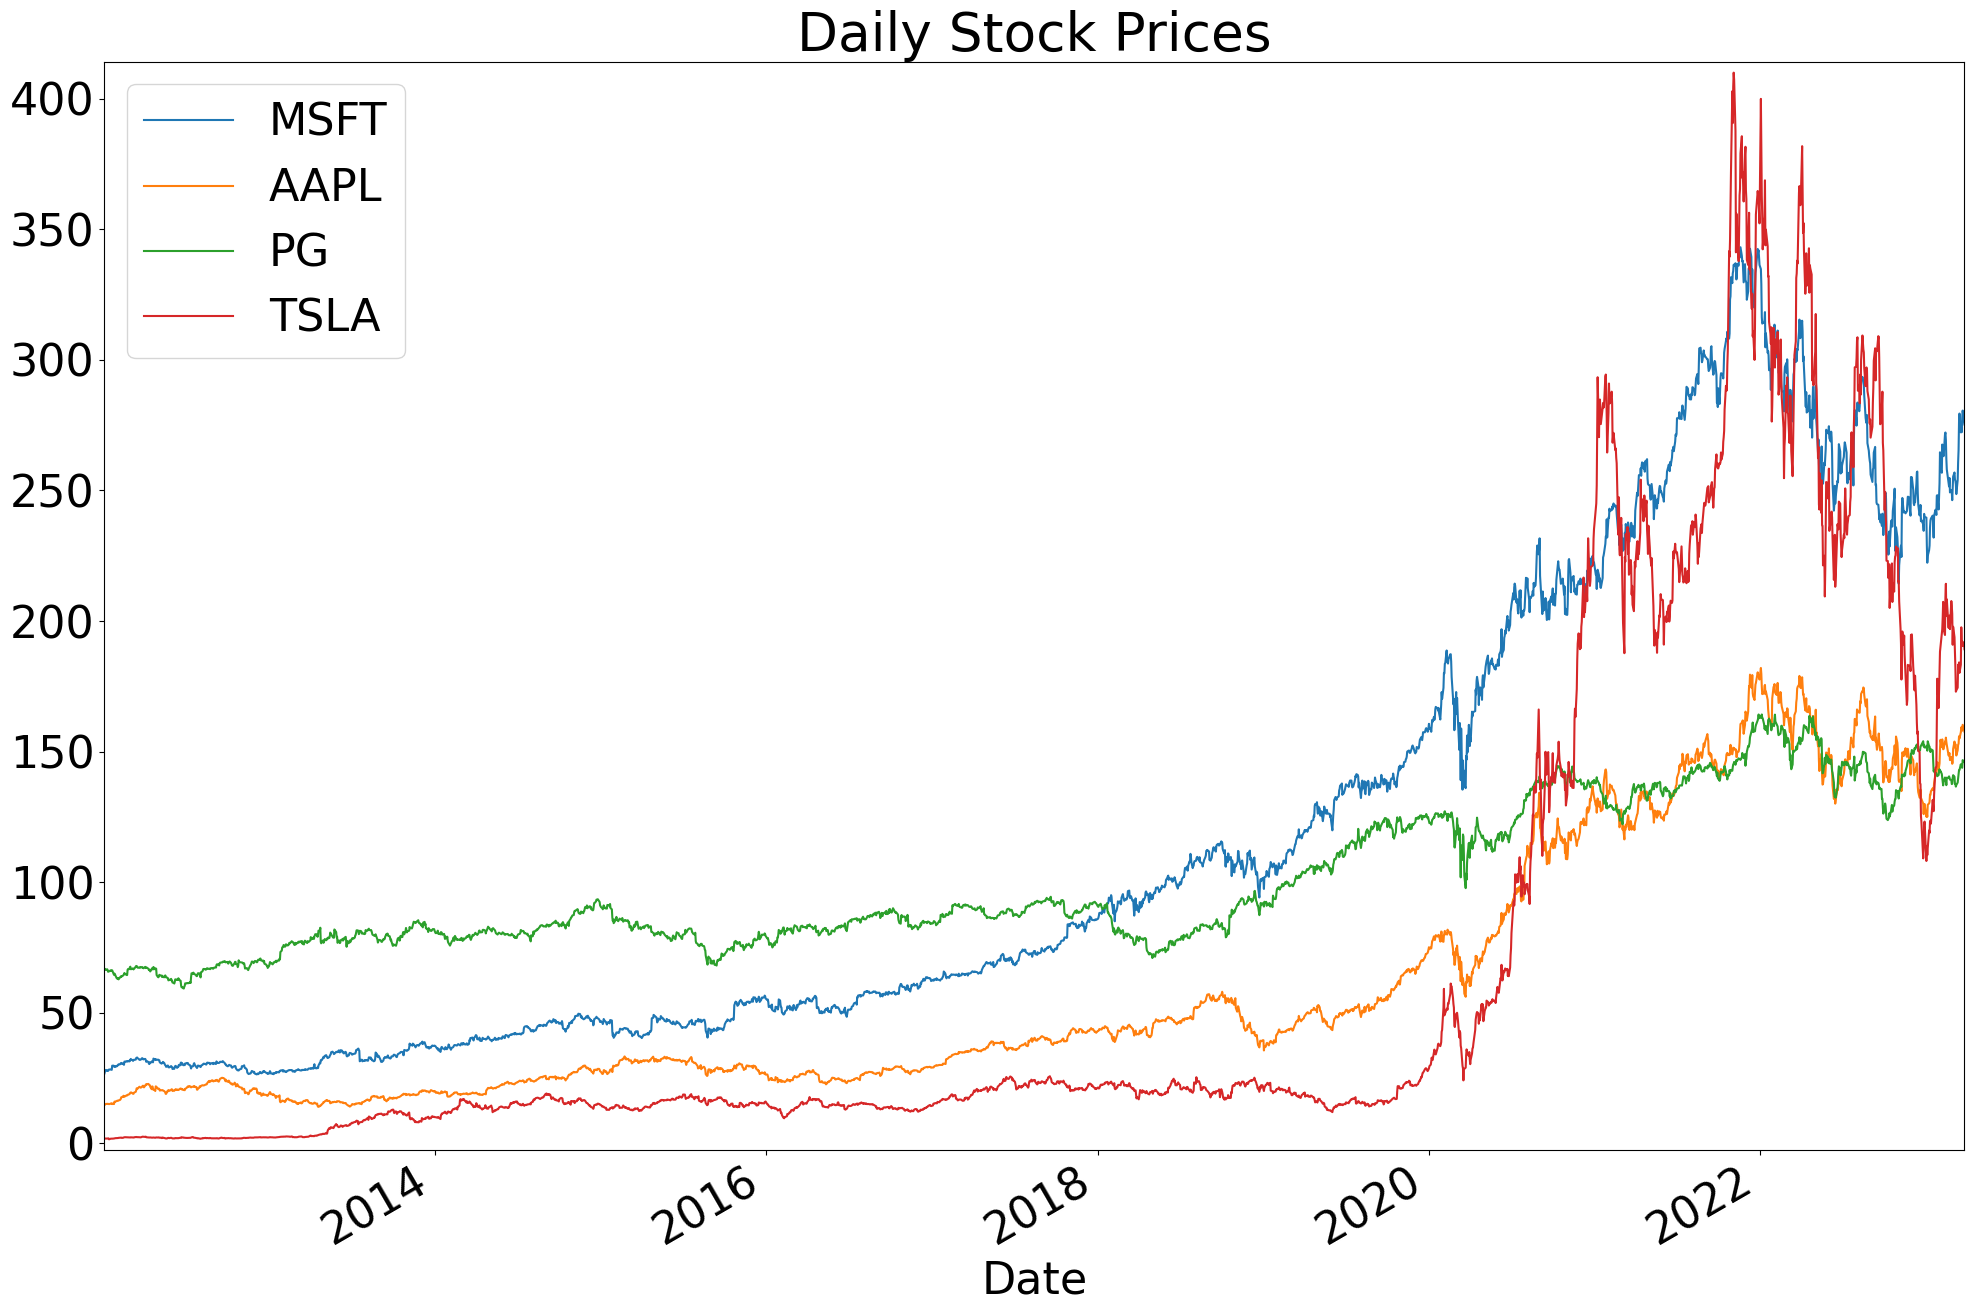

In [13]:
import matplotlib.pyplot as plt

plt.rcParams["axes.xmargin"] = 0
plt.rcParams["axes.ymargin"] = 0.01
plt.rcParams.update({'font.size': 32})

fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)
ax.set_title("Daily Stock Prices")

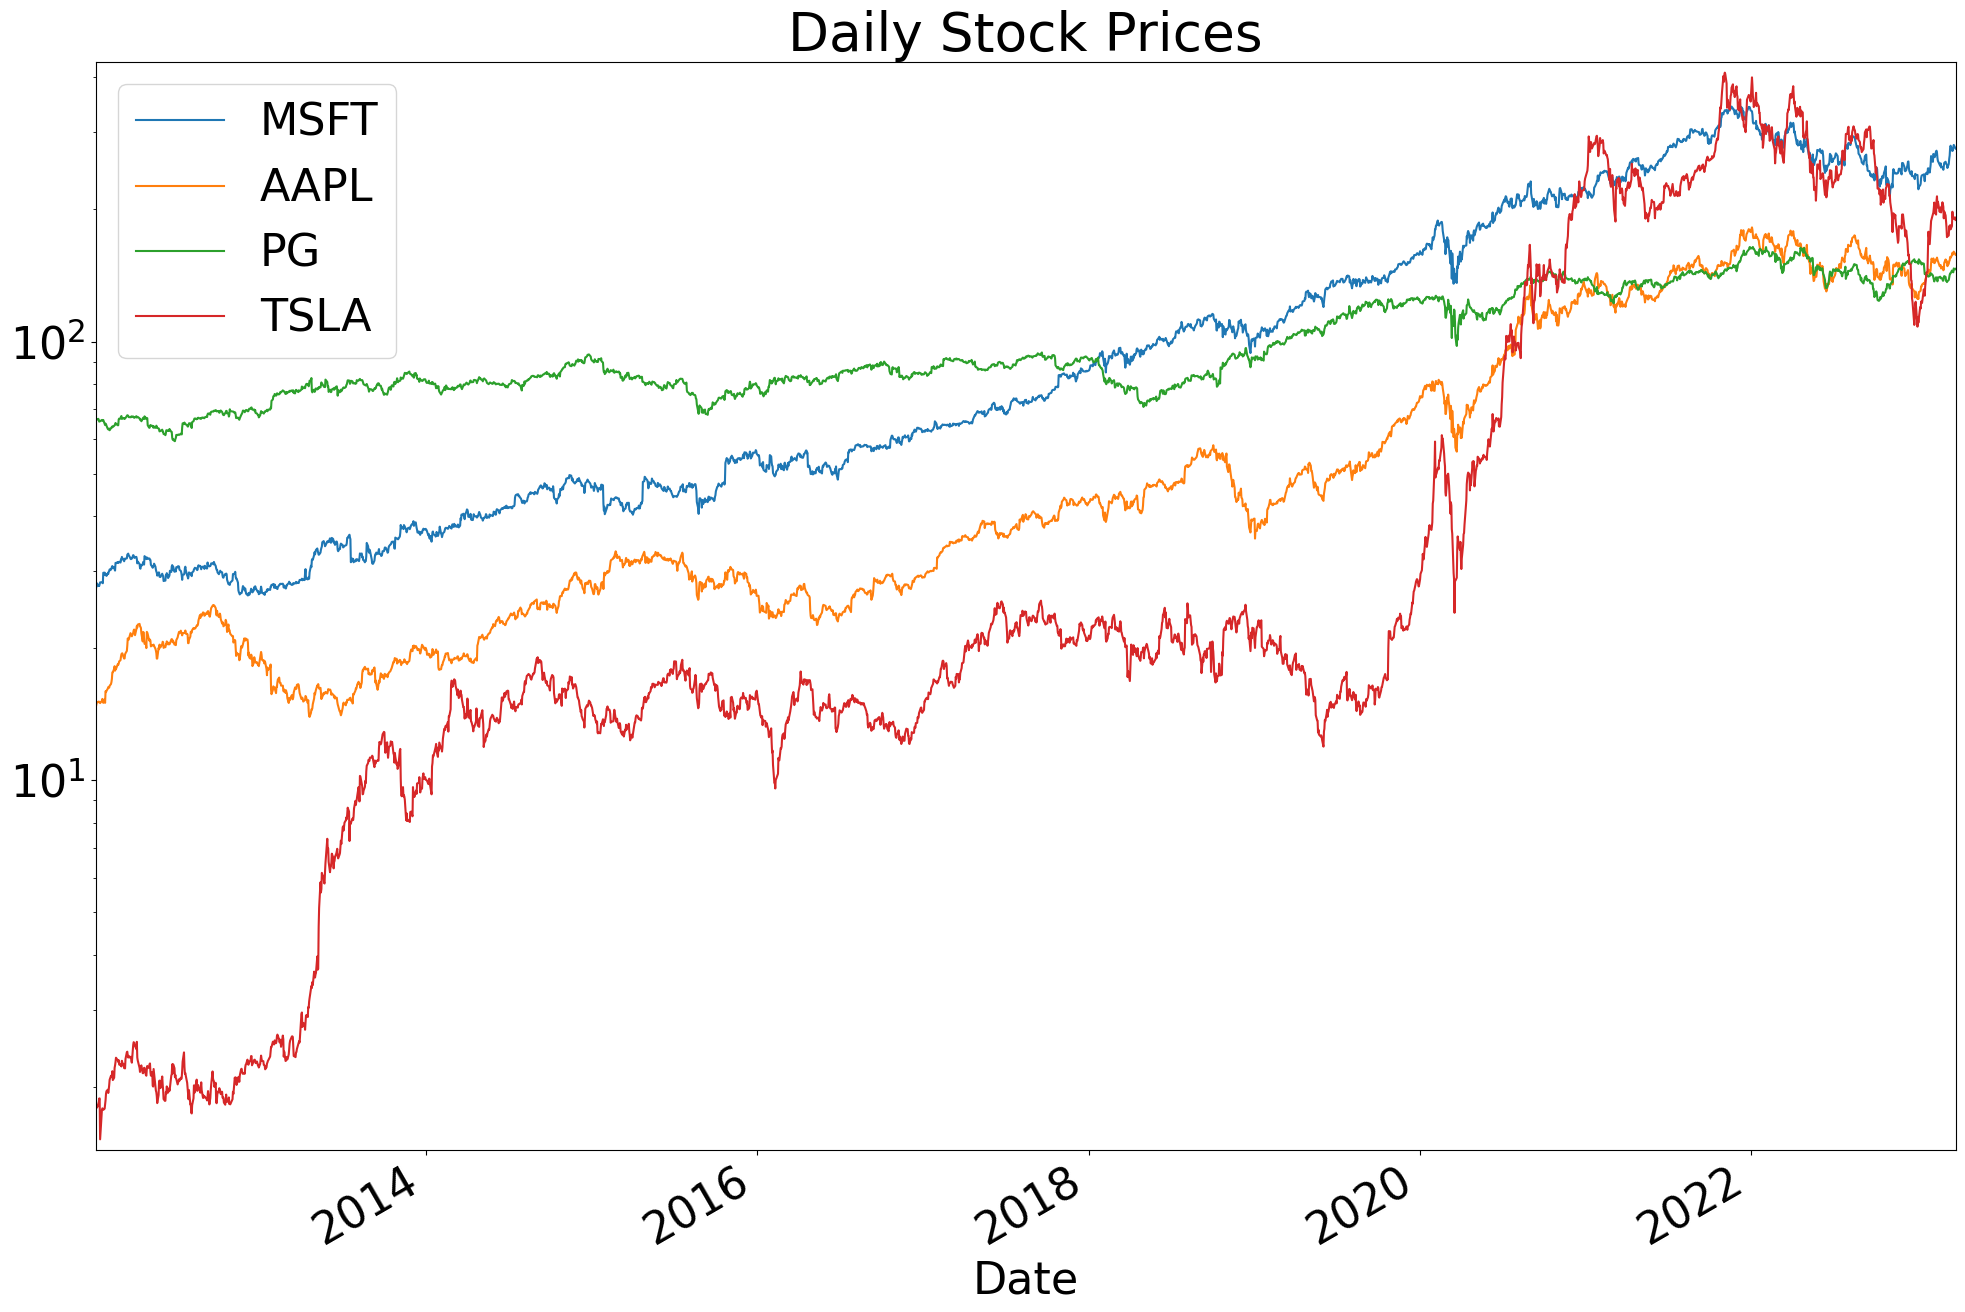

In [14]:
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)
ax.set_title("Daily Stock Prices")
ax.set_yscale("log")

Text(0.5, 1.0, 'AAPL')

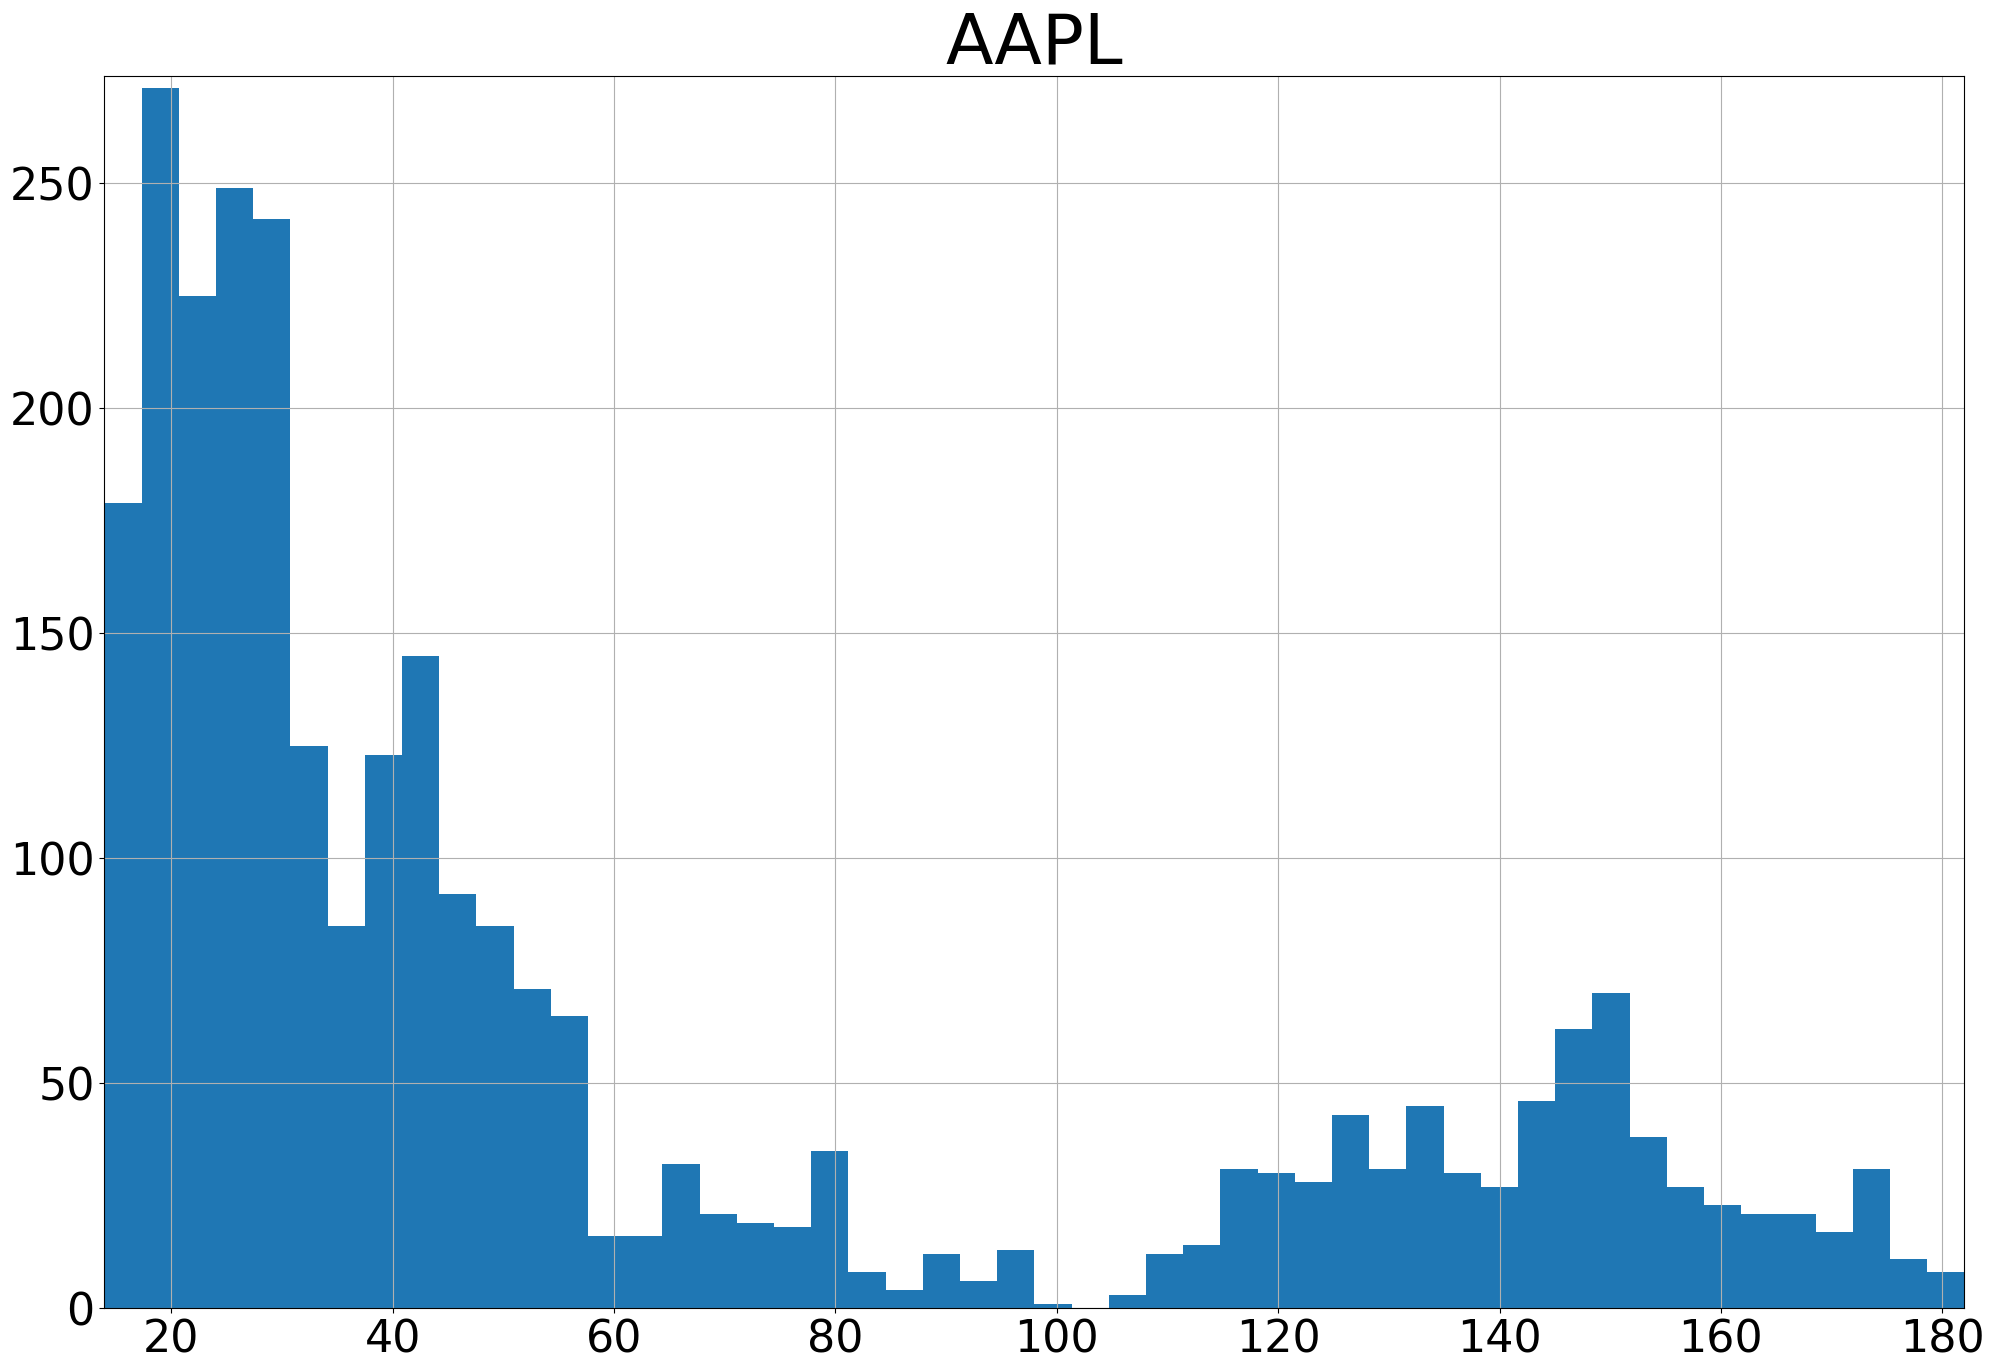

In [15]:
fig, ax = plt.subplots(figsize = (24, 16))
stock = "AAPL"
close_data[stock].hist(bins = 50)
ax.set_title(stock, fontsize = 50)

In [16]:
log_data = np.log(close_data)
log_data

MSFT      AAPL        PG      TSLA
Date                                              
2012-01-03  3.287282  2.686948  4.202152  0.627007
2012-01-04  3.310543  2.692308  4.201703  0.613743
2012-01-05  3.320710  2.703349  4.197503  0.592221
2012-01-06  3.336125  2.713748  4.195094  0.584448
2012-01-09  3.322875  2.712161  4.199305  0.597003
...              ...       ...       ...       ...
2023-03-22  5.606868  5.061519  4.969744  5.253058
2023-03-23  5.626397  5.068464  4.968354  5.258641
2023-03-24  5.636823  5.076735  4.988526  5.249180
2023-03-27  5.621777  5.064366  4.983264  5.256505
2023-03-28  5.617607  5.060377  4.986069  5.242752

[2827 rows x 4 columns]

Text(0.5, 1.0, 'AAPL')

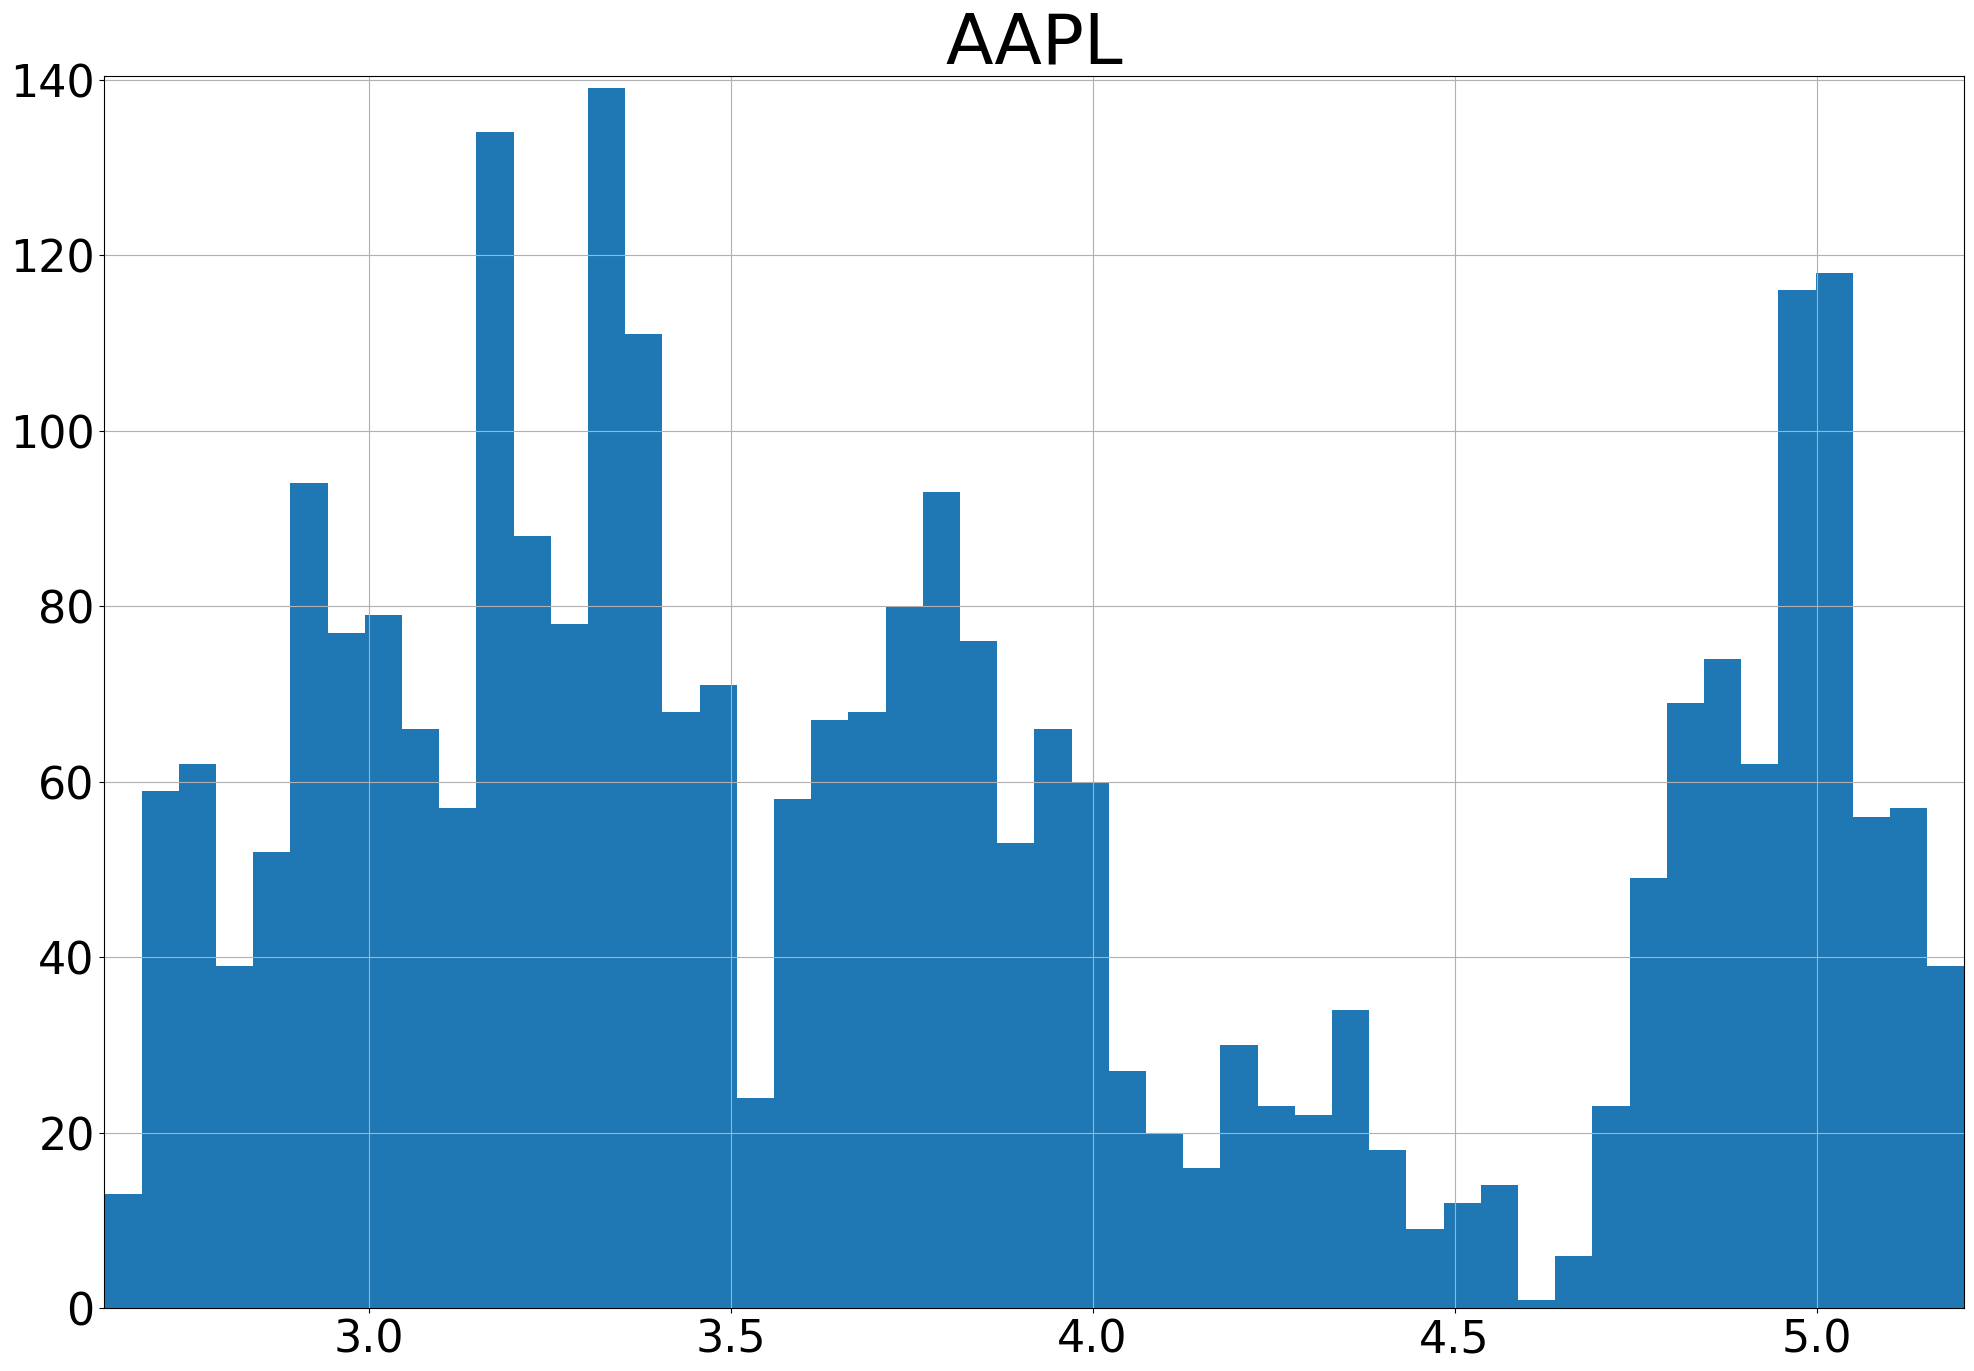

In [17]:
fig, ax = plt.subplots(figsize = (24, 16))
log_data[stock].hist(bins = 50)
ax.set_title(stock, fontsize = 50)

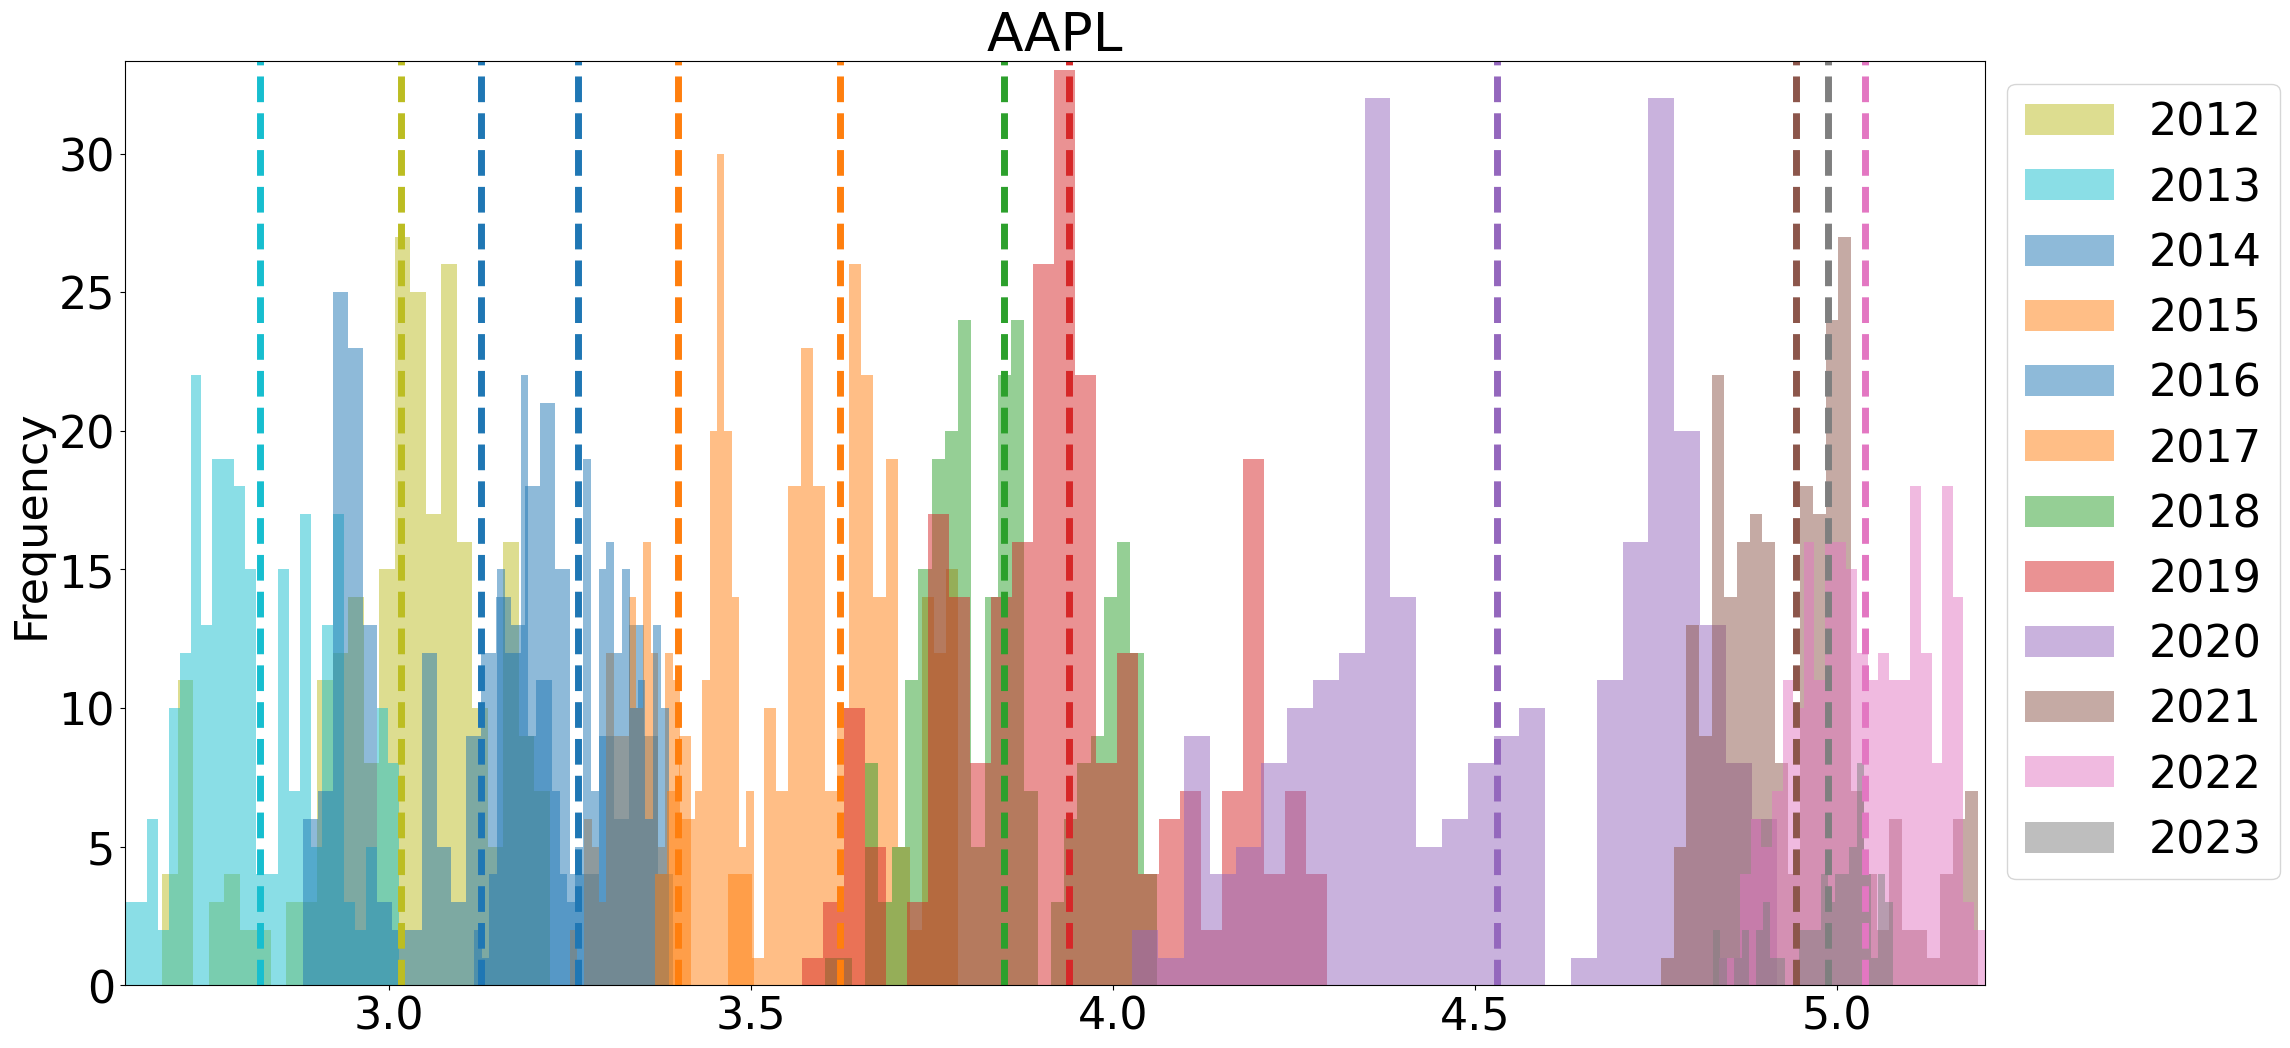

In [18]:
def graph_yearly_distributions(data, stock, figsize = (24, 12),
                              density = False):
    years = sorted(list(set(data.index.year)))
    fig, ax = plt.subplots(figsize = figsize)
    for year in years:
        color = "C" + str(year % 12)
        year = str(year)
        plot_data = data[stock].loc[year]
        plot_data.plot.hist(color = color,
                            ax = ax,
                            alpha = 0.5,
                            bins = 25,
                            label = year,
                            density = density)
        ax.axvline(plot_data.mean(),
                  color = color,
                  linewidth = 5,
                  ls = "--")
        ax.set_title(stock)
        ax.legend(bbox_to_anchor = (1,1))
    
graph_yearly_distributions(log_data, stock, density = False)

In [19]:
price_change_data = log_data.diff()
price_change_data

MSFT      AAPL        PG      TSLA
Date                                              
2012-01-03       NaN       NaN       NaN       NaN
2012-01-04  0.023261  0.005360 -0.000449 -0.013264
2012-01-05  0.010167  0.011041 -0.004201 -0.021522
2012-01-06  0.015415  0.010400 -0.002408 -0.007773
2012-01-09 -0.013250 -0.001587  0.004211  0.012556
...              ...       ...       ...       ...
2023-03-22 -0.005457 -0.009145 -0.000625 -0.033085
2023-03-23  0.019530  0.006945 -0.001390  0.005582
2023-03-24  0.010426  0.008271  0.020172 -0.009461
2023-03-27 -0.015047 -0.012369 -0.005262  0.007326
2023-03-28 -0.004170 -0.003988  0.002805 -0.013753

[2827 rows x 4 columns]

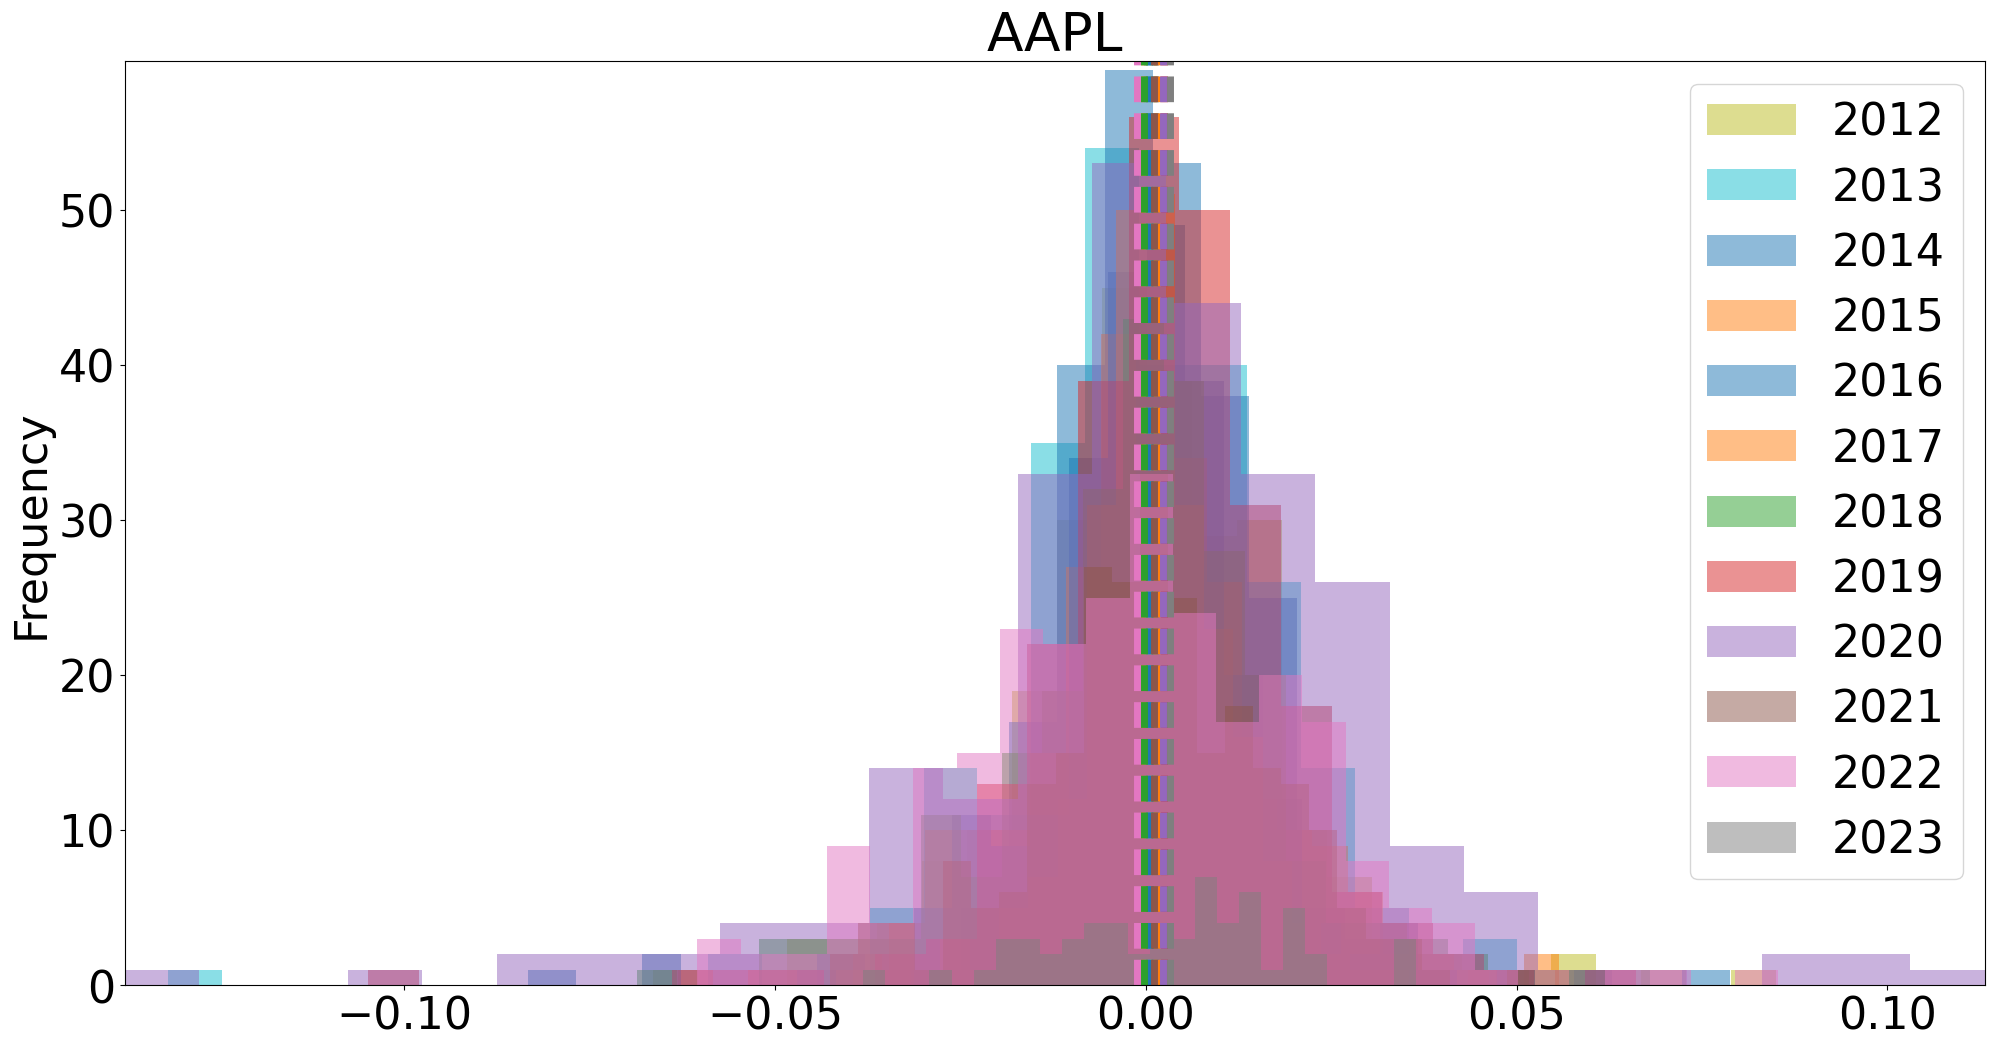

In [20]:
graph_yearly_distributions(price_change_data, stock, density = False)

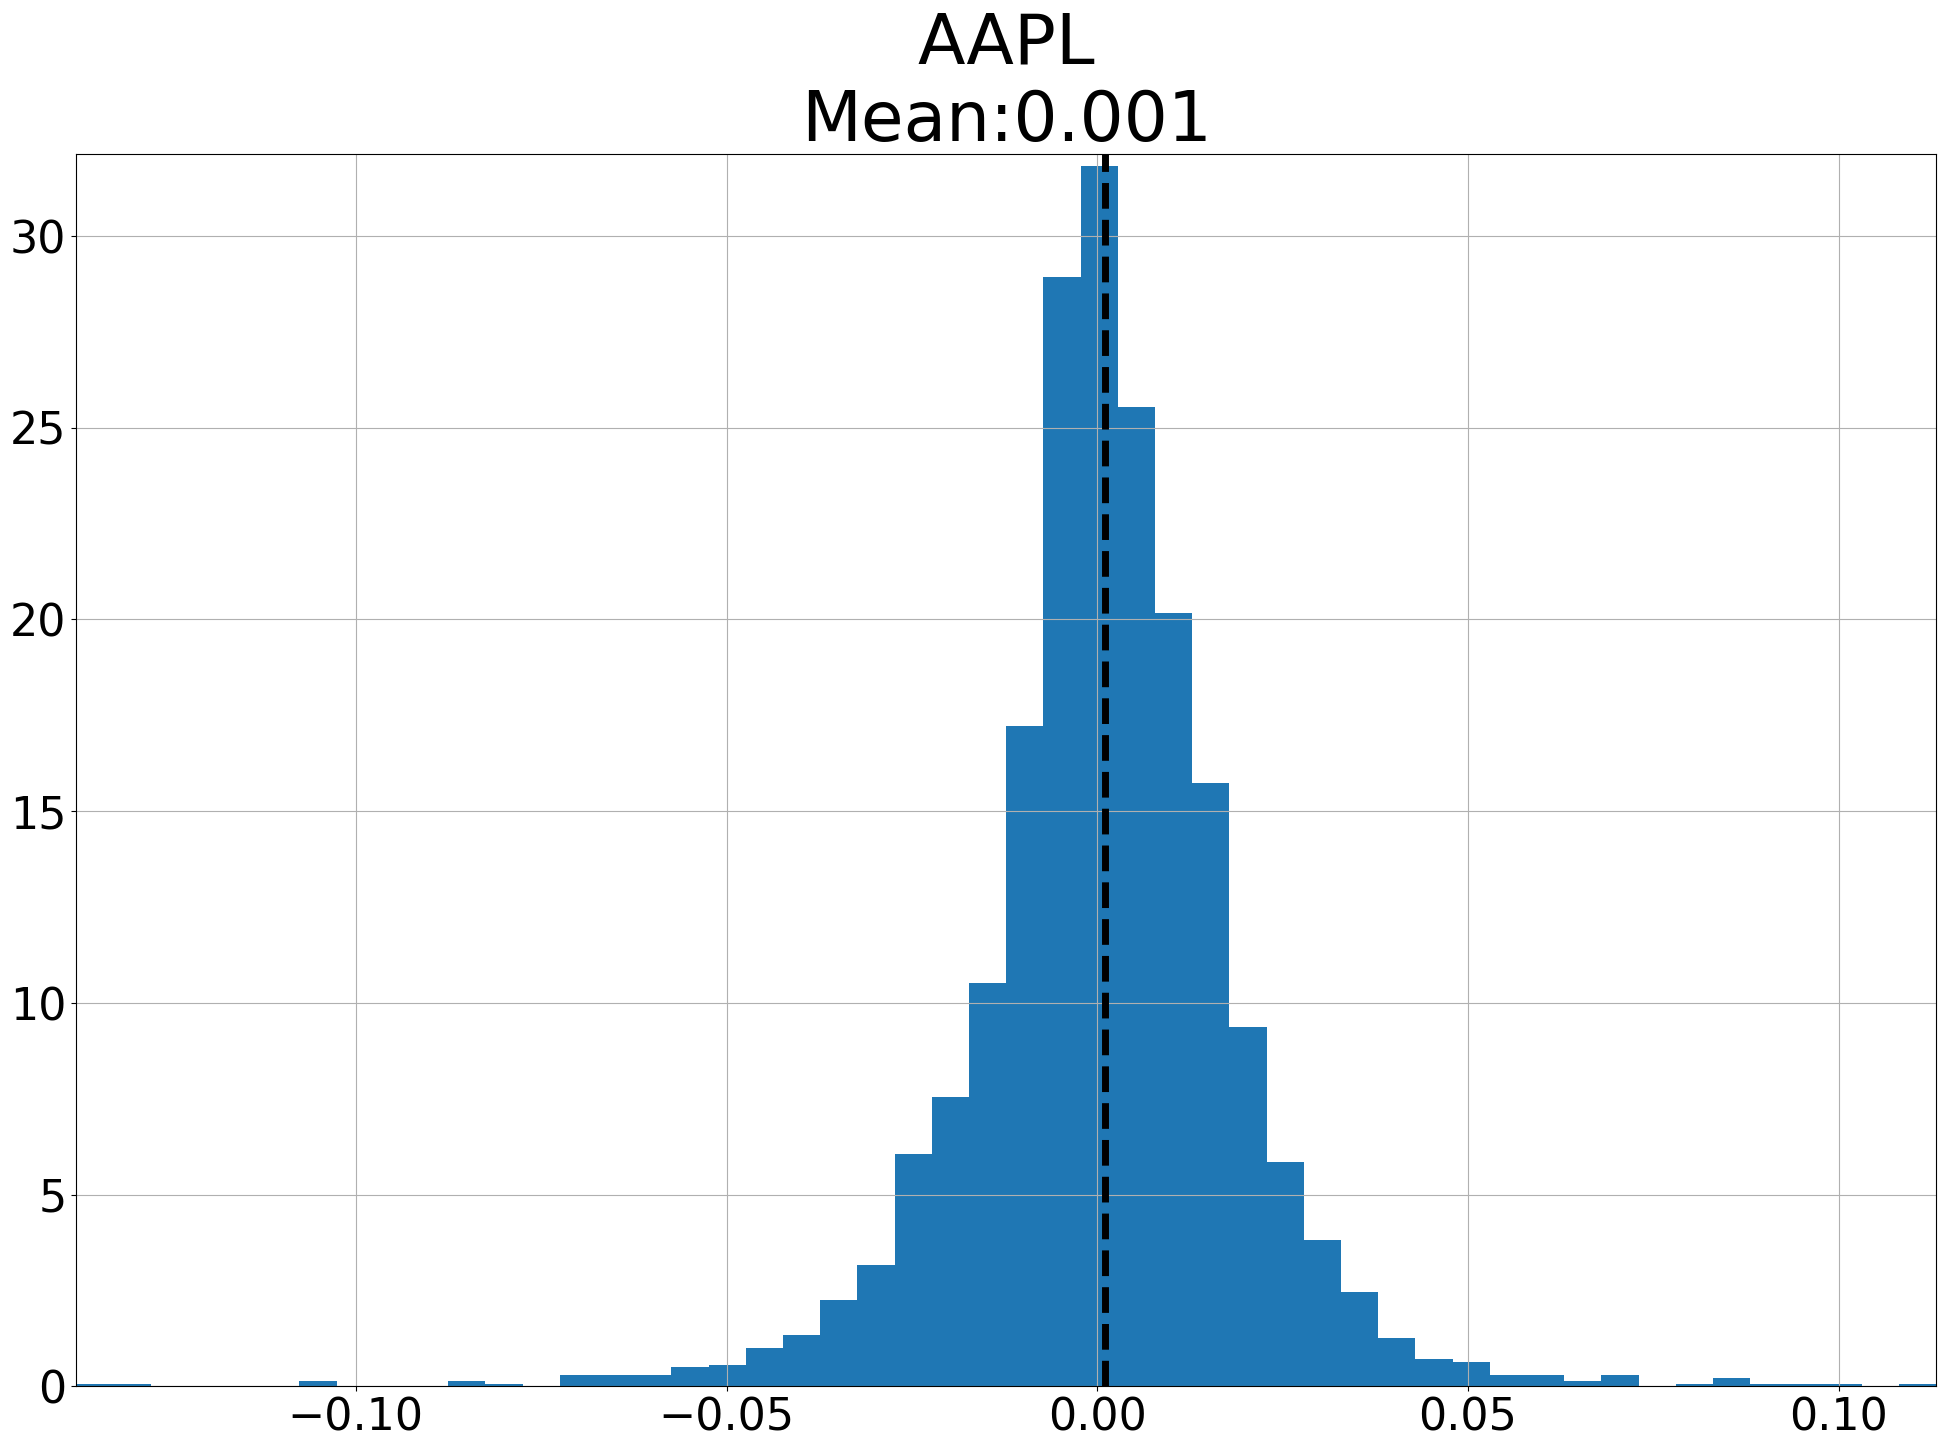

In [21]:
fig, ax = plt.subplots(figsize = (24, 16))
stock = "AAPL"
price_change_mean = round(price_change_data[stock].mean(),3)
price_change_data[stock].dropna().hist(bins = 50, density = True)
ax.set_title(stock + "\nMean:" + str(price_change_mean), fontsize = 50)
ax.axvline(price_change_mean,
          color = "k",
          linewidth = 5,
          ls = "--")

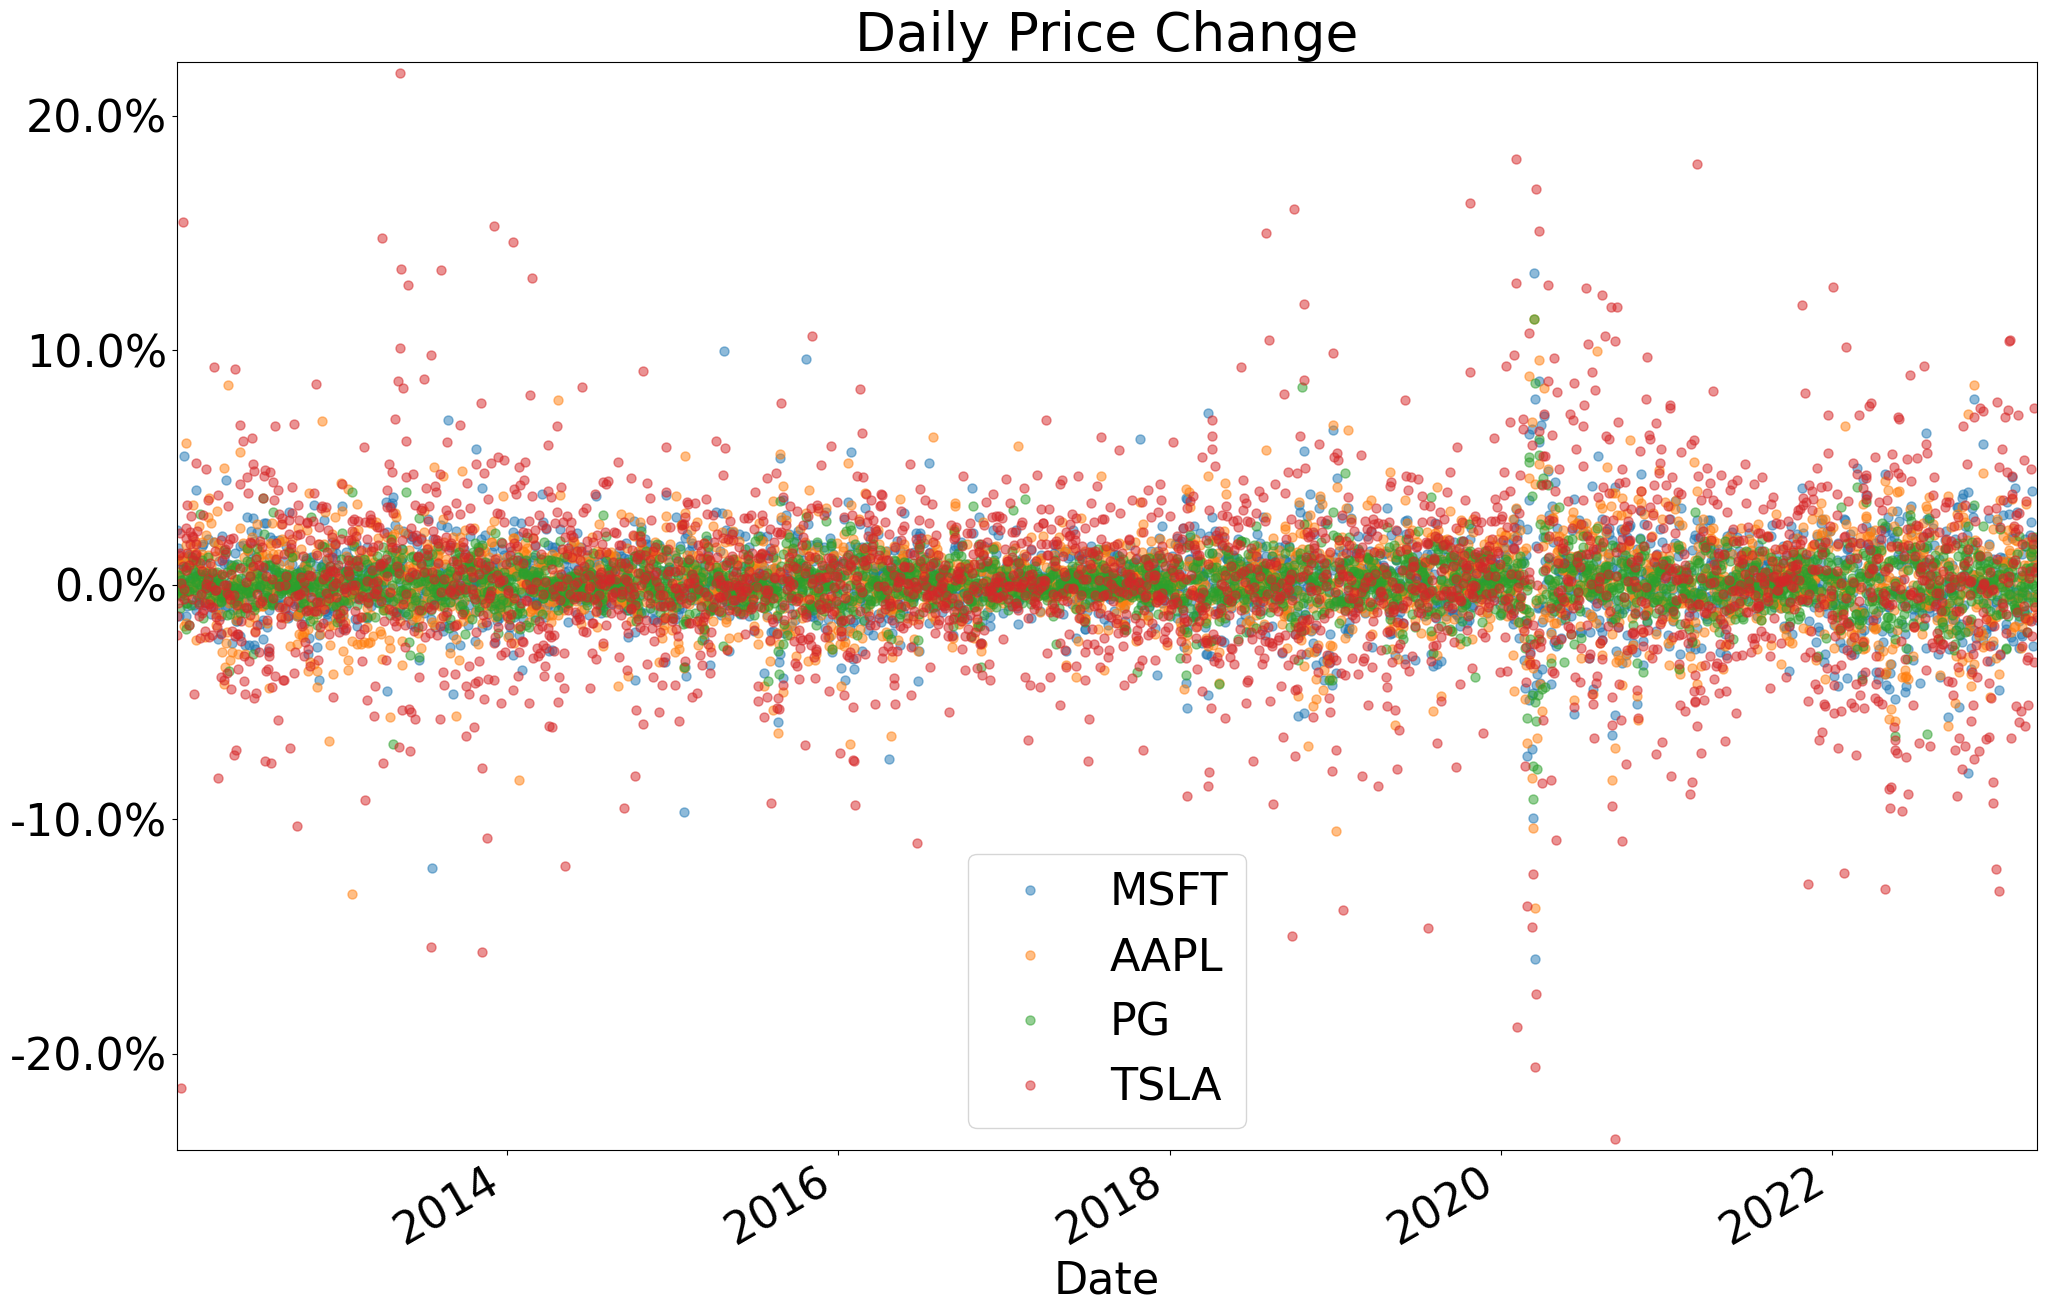

In [22]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data.keys():
    price_change_data[key].plot.line(marker = ".",
                                     markersize = 13,
                                     alpha = 0.5,
                                     ls = "", 
                                     ax = ax)
    
ax.set_title("Daily Price Change")
# access y-axis values
y_vals = ax.get_yticks()
# transform y-axis values to be in form of percent instead of decimal
ax.set_yticklabels([str(round(y * 100,1)) + "%" for y in y_vals])
plt.legend()

In [23]:
stats_df = gather_statistics(price_change_data.mul(100),
                            sample = True).round(2)
stats_df

MSFT  AAPL     PG   TSLA
mean      0.08  0.08   0.03   0.16
median    0.06  0.08   0.04   0.13
variance  2.82  3.35   1.29  12.86
S.D.      1.68  1.83   1.13   3.59
Skewness -0.22 -0.28  -0.04  -0.05
Kurtosis  8.74  5.73  12.02   5.06

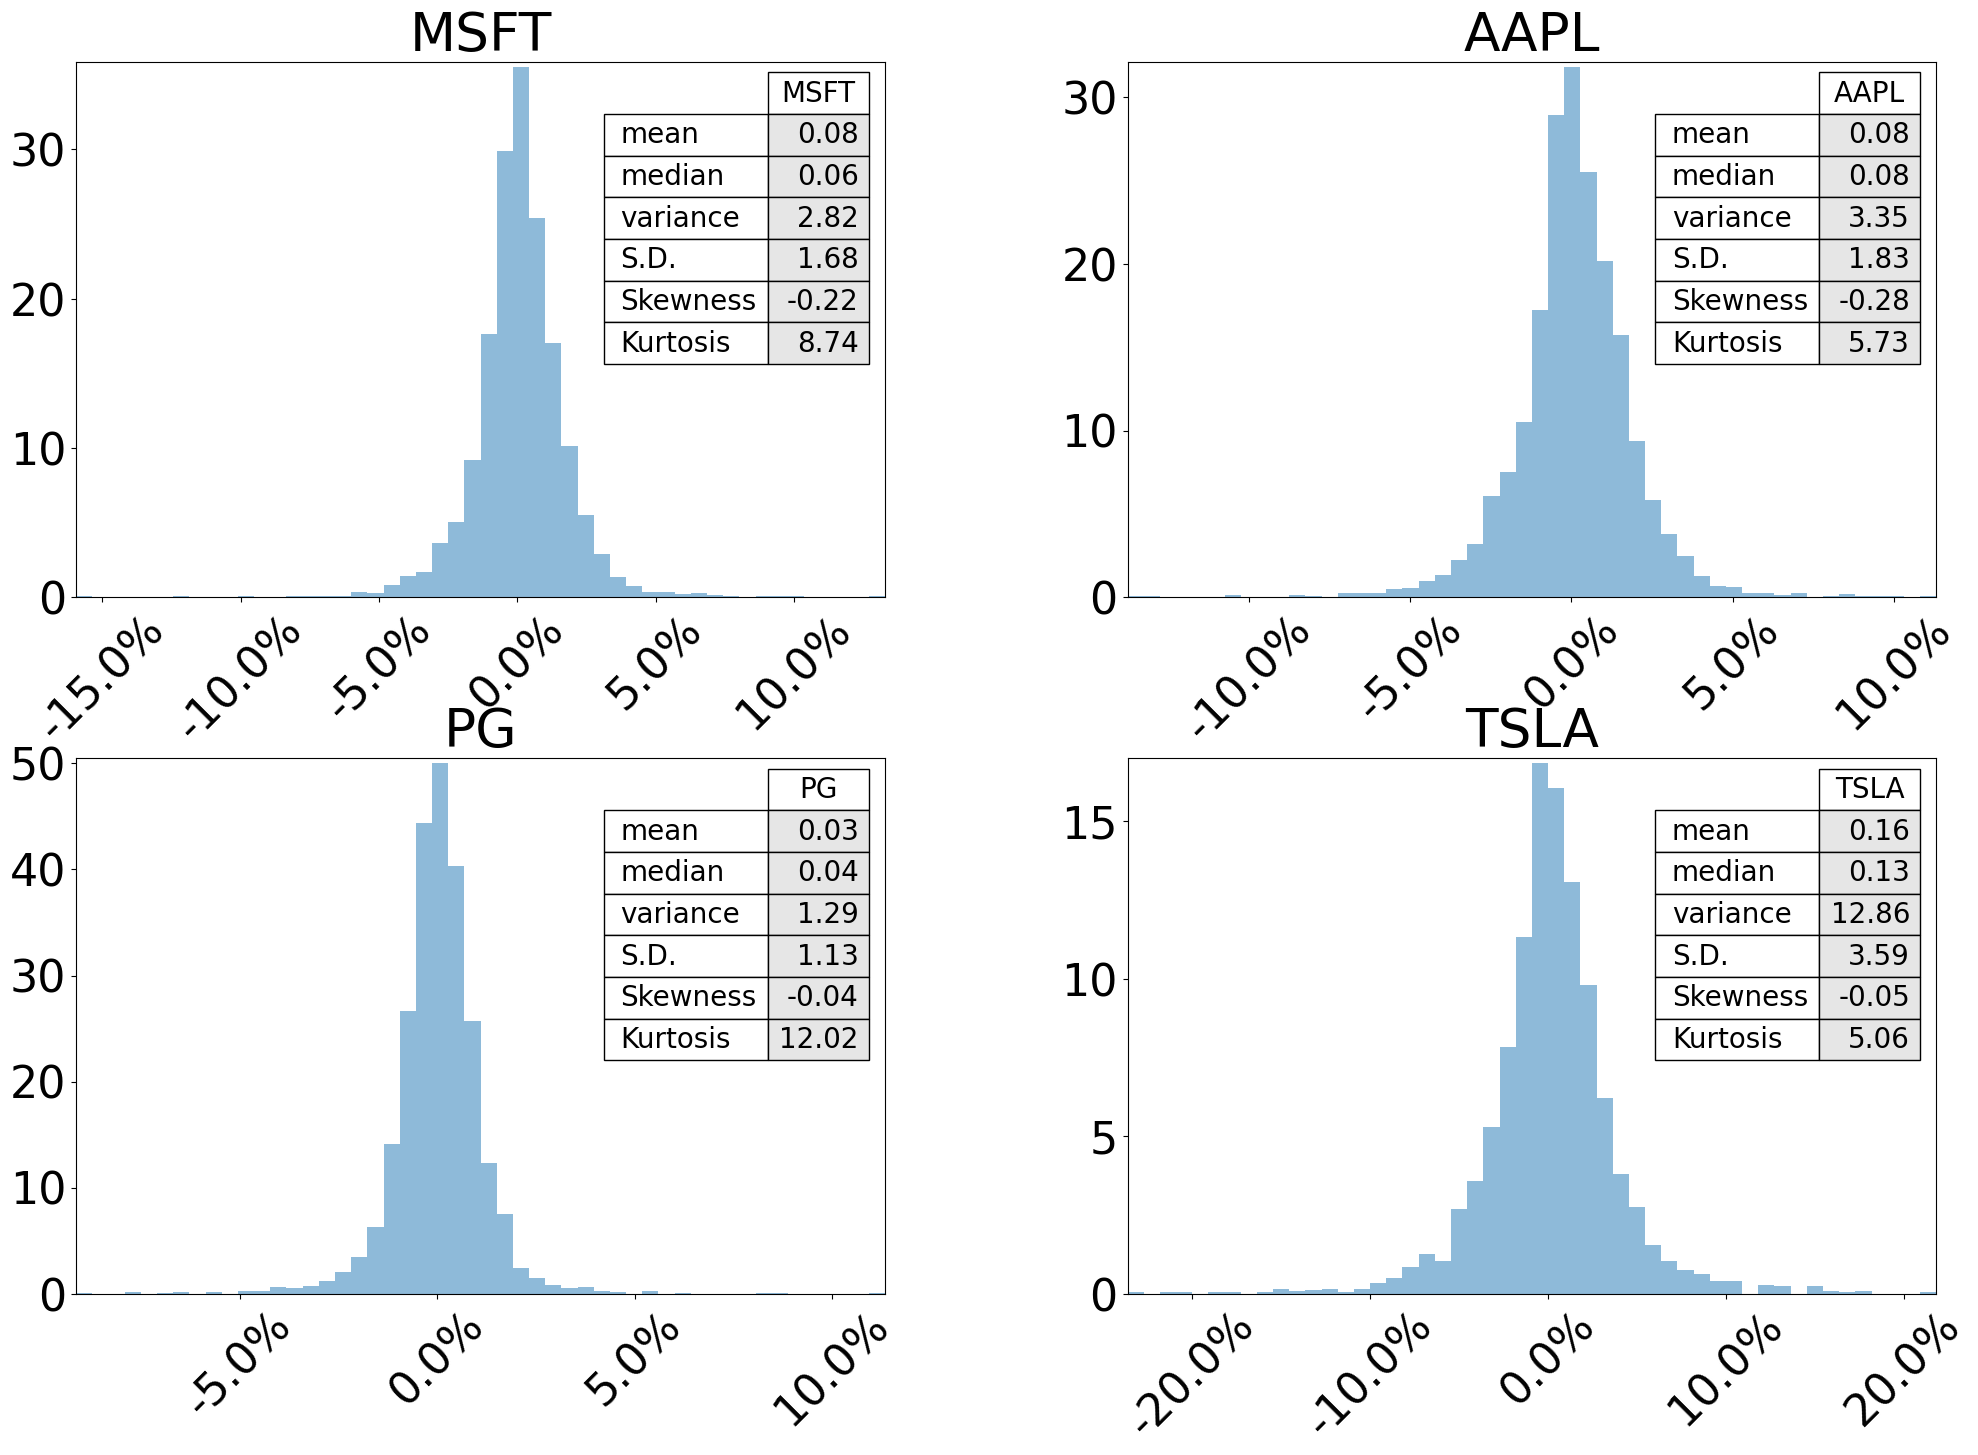

In [24]:
from pandas.plotting import table

# axs is a list of lists whose sublists contain relevant axes that
# comprise the multiplot
fig, axs = plt.subplots(2,2, figsize = (24,16))
price_change_data.hist(bins = 50,
                      alpha = 0.5,
                      label = price_change_data.keys(),
                      ax = axs,
                      density = True)
# adjust the xtick labels in a multiplot by using a for loop to access
# sublists
for sublist in axs:
# and to access elements in each sublist
    for ax in sublist:
        x_vals = ax.get_xticks() 
        ax.set_xticklabels([str(round(x * 100,1)) + "%" for x in x_vals],
                         rotation = 45)
        stock = ax.get_title()
        hist_data = stats_df[stock]
        
        stats = table(ax, hist_data, 
                     colWidths = [.1], 
                     cellColours = [[(0.9,0.9,0.9)]]*6, 
                     loc = "upper right")
        stats.scale(1.25, 2.5)
        stats.auto_set_font_size(False)
        stats.set_fontsize(20)
        ax.grid(False)
        

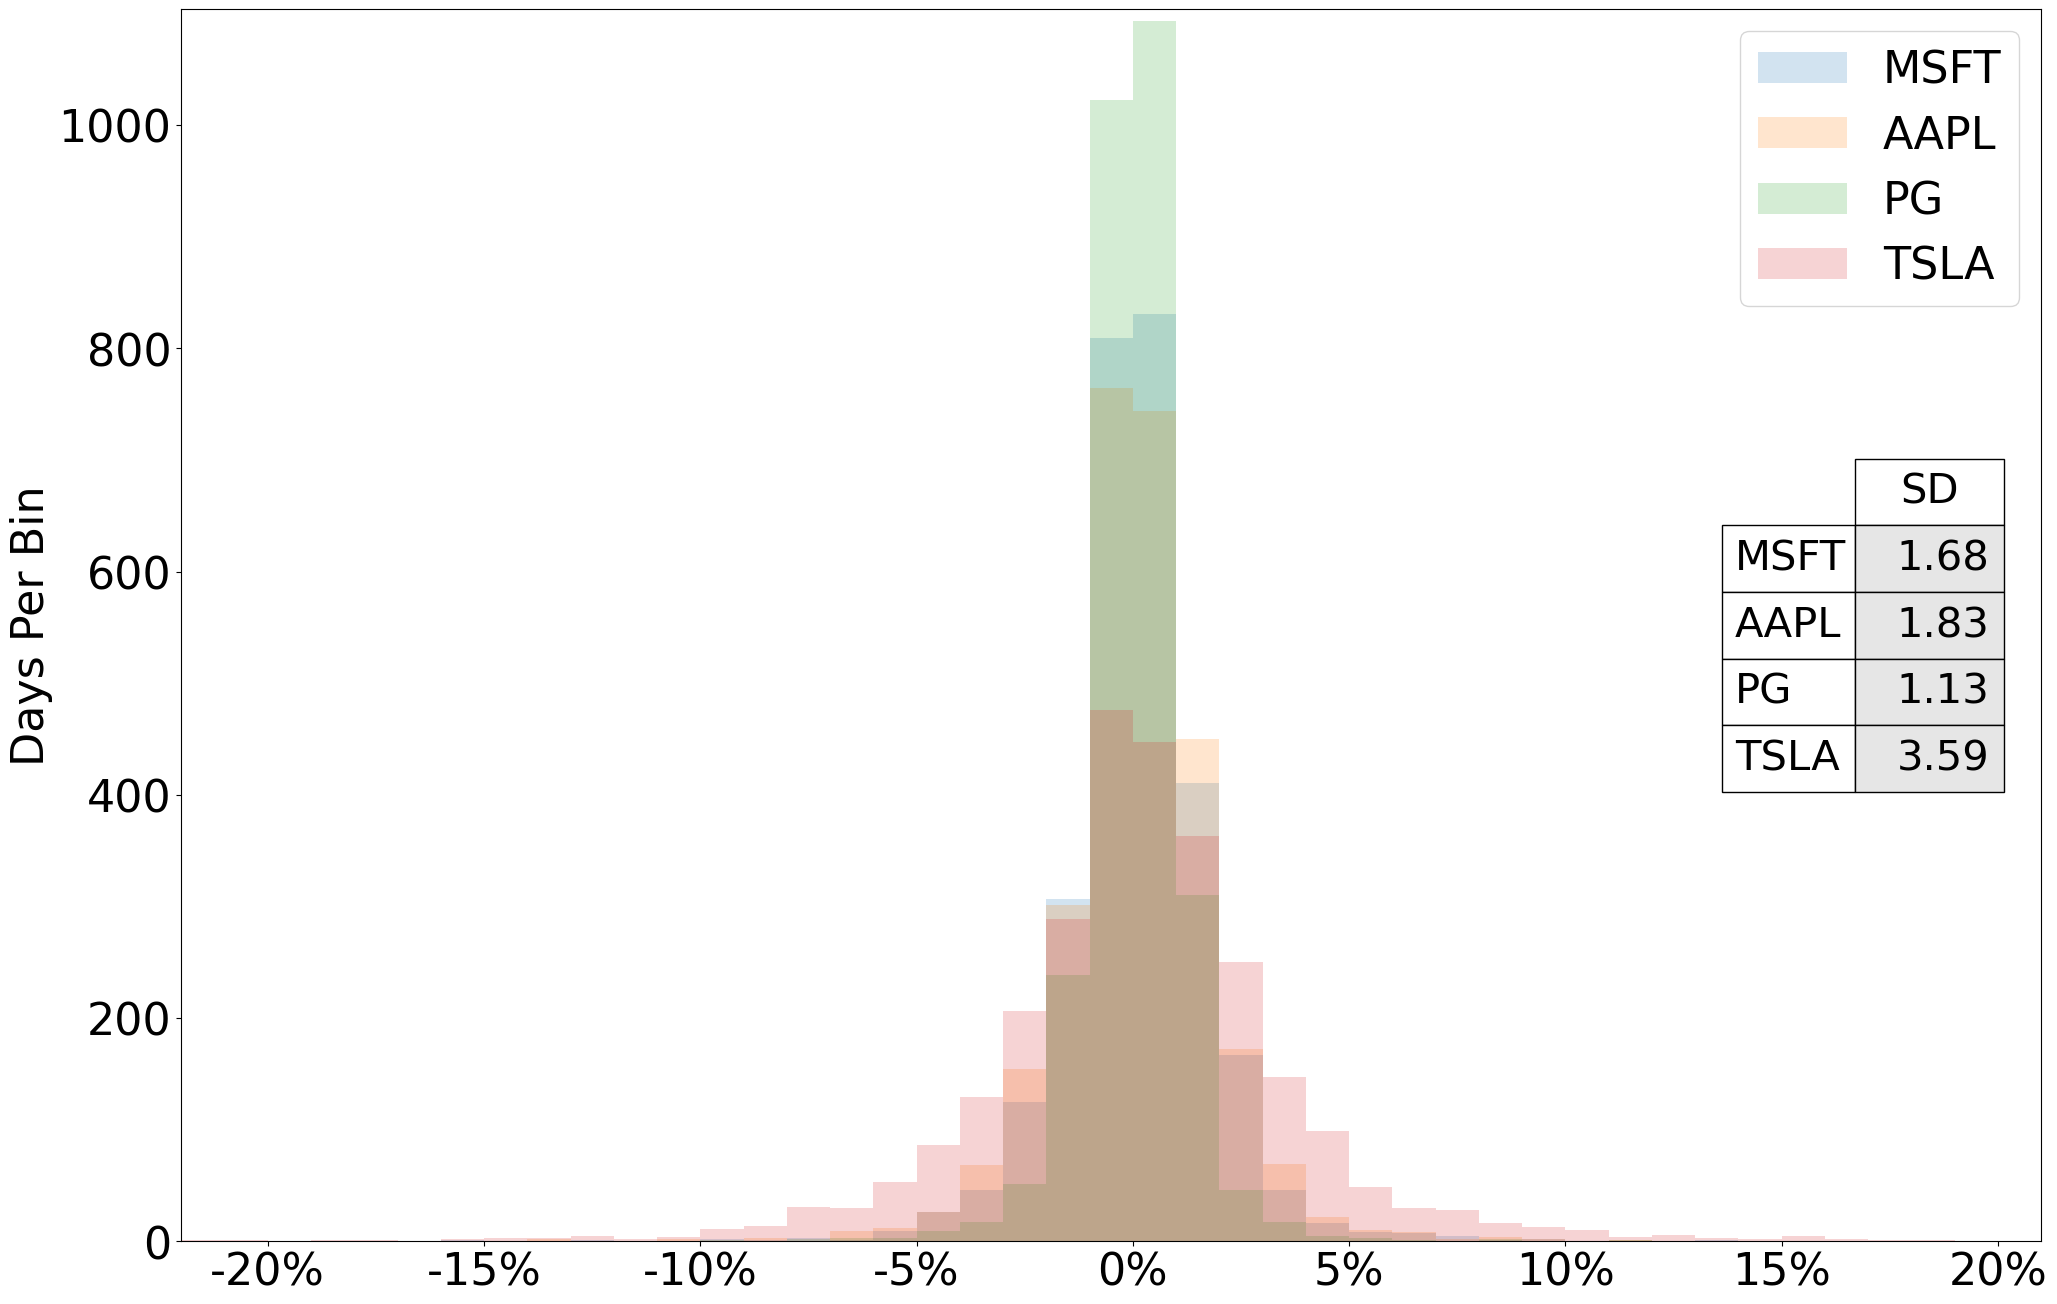

In [25]:
plot_data = price_change_data.mul(100)
fig, ax = plt.subplots(figsize = (24, 16))
for key in price_change_data:
                                # set bins to be length of 1%
    plot_data[key].hist(bins = [x for x in range(-22, 22, 1)],
                               alpha = 0.2,
                               label = key,
                               density = False,
                               ax = ax)
ax.set_ylabel("Days Per Bin")
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])
std_df = round(pd.DataFrame(plot_data.std(),
                            columns = ["SD"]),2)
std_df.index.name = "SD"
stats = table(ax, 
             std_df, 
             colWidths=[.1], 
             cellColours=[[(.9,.9,.9)]]*4, 
             loc = "center right")
stats.scale(0.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)
plt.legend()

In [26]:
std_df

SD
SD        
MSFT  1.68
AAPL  1.83
PG    1.13
TSLA  3.59

In [27]:
plot_data.std()

MSFT    1.679479
AAPL    1.830863
PG      1.134010
TSLA    3.586343
dtype: float64

In [28]:
# measure data in terms of standard deviation
norm_plot_data = price_change_data.div(price_change_data.std())
norm_plot_data

MSFT      AAPL        PG      TSLA
Date                                              
2012-01-03       NaN       NaN       NaN       NaN
2012-01-04  1.385020  0.292741 -0.039592 -0.369859
2012-01-05  0.605375  0.603039 -0.370413 -0.600102
2012-01-06  0.917860  0.568013 -0.212355 -0.216752
2012-01-09 -0.788935 -0.086704  0.371294  0.350098
...              ...       ...       ...       ...
2023-03-22 -0.324931 -0.499499 -0.055099 -0.922532
2023-03-23  1.162840  0.379345 -0.122577  0.155650
2023-03-24  0.620783  0.451770  1.778835 -0.263803
2023-03-27 -0.895904 -0.675610 -0.464012  0.204264
2023-03-28 -0.248267 -0.217835  0.247376 -0.383496

[2827 rows x 4 columns]

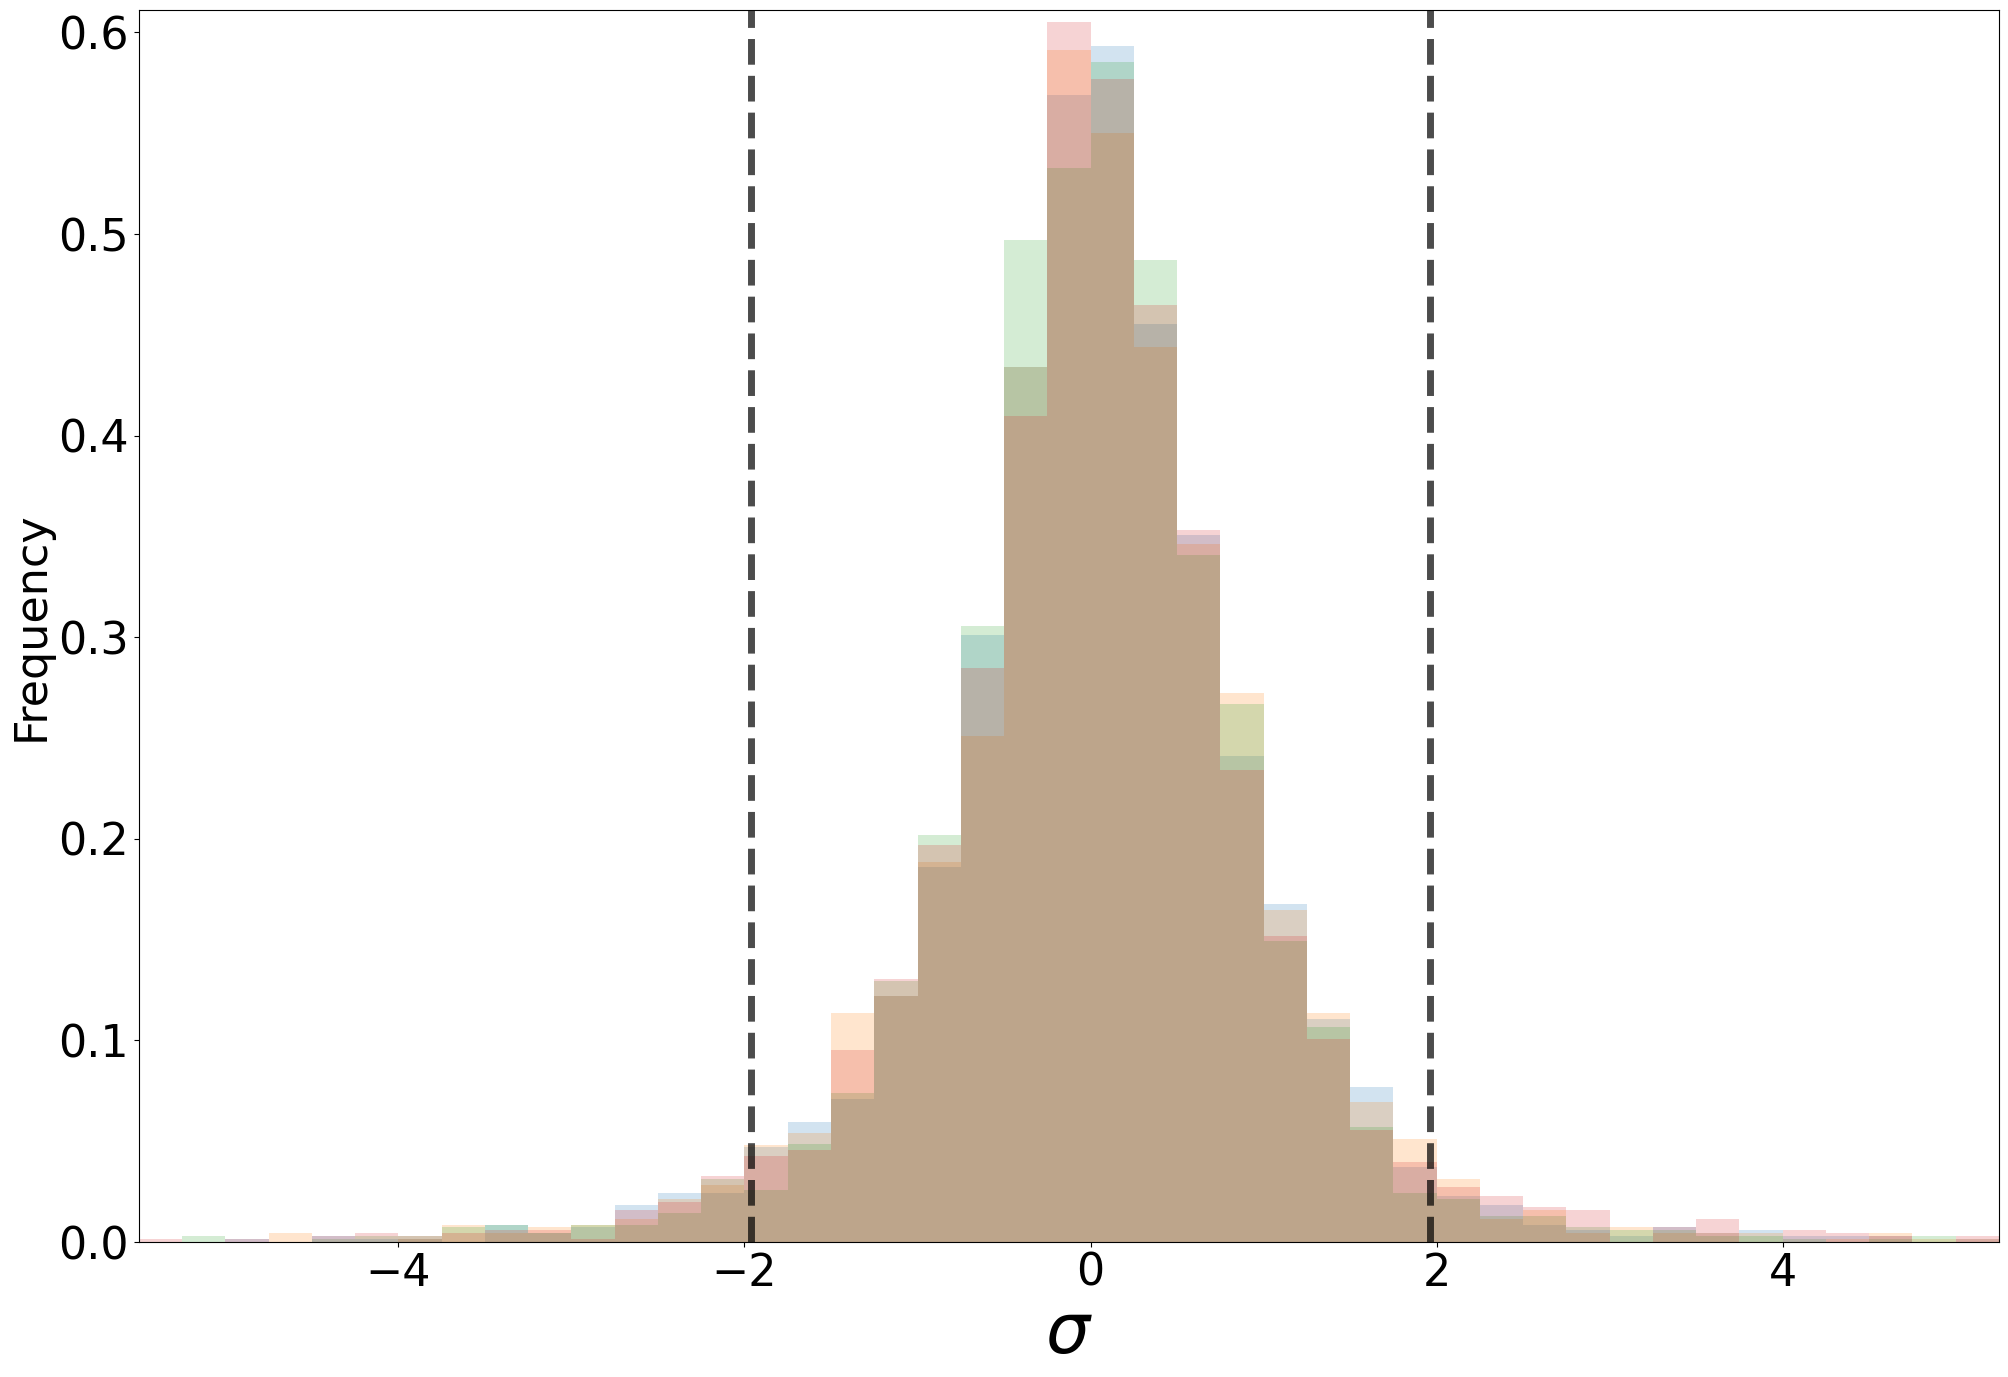

In [29]:
# replot after normalizing data by standard deviation
fig, ax = plt.subplots(figsize = (24, 16))
for key in norm_plot_data:
                                # set bins to be length of 1%
    norm_plot_data[key].hist(bins = [x / 4 for x in range(-22, 22, 1)],
                               alpha = 0.2,
                               label = key,
                             # setting density true shows frequency by units
                             # of SDs
                               density = True,
                               ax = ax,)
ax.set_ylabel("Frequency")
ax.set_xlabel("$\sigma$", fontsize = 50)
# if this is a normal distribution, 95% of the body of the distributiong should
# lie between -1.96 and 1.96 SDs from the mean
ax.axvline(-1.96, linewidth = 5, ls = "--", color = "k", alpha  = 0.7)
ax.axvline(1.96, linewidth = 5, ls = "--", color = "k", alpha  = 0.7)
ax.grid(False)

In [30]:
price_change_data["S&P 500"] = web.DataReader('^GSPC',  
                       start = start,
                       end = end)["Close"]

[*********************100%***********************]  1 of 1 completed


In [31]:
price_change_data["S&P 500"] = np.log(price_change_data["S&P 500"]).diff()
price_change_data

MSFT      AAPL        PG      TSLA   S&P 500
Date                                                        
2012-01-03       NaN       NaN       NaN       NaN       NaN
2012-01-04  0.023261  0.005360 -0.000449 -0.013264  0.000188
2012-01-05  0.010167  0.011041 -0.004201 -0.021522  0.002939
2012-01-06  0.015415  0.010400 -0.002408 -0.007773 -0.002540
2012-01-09 -0.013250 -0.001587  0.004211  0.012556  0.002259
...              ...       ...       ...       ...       ...
2023-03-22 -0.005457 -0.009145 -0.000625 -0.033085 -0.016600
2023-03-23  0.019530  0.006945 -0.001390  0.005582  0.002980
2023-03-24  0.010426  0.008271  0.020172 -0.009461  0.005624
2023-03-27 -0.015047 -0.012369 -0.005262  0.007326  0.001646
2023-03-28 -0.004170 -0.003988  0.002805 -0.013753       NaN

[2827 rows x 5 columns]

In [32]:
def calculate_beta(data, stock_key, market_key):
    df = data[[stock_key, market_key]].dropna()
    stock_cov = covariance(df[stock_key], df[market_key], sample = True)
    market_var = variance(df[market_key], sample = True)
    beta = stock_cov / market_var
    
    return beta
    
betas = {}
for stock in stocks:
    betas[stock] = calculate_beta(price_change_data, stock, "S&P 500")
pd.DataFrame(betas, index = ["$\\beta$"]).T

$\beta$
MSFT  1.188785
AAPL  1.173157
PG    0.582419
TSLA  1.447236

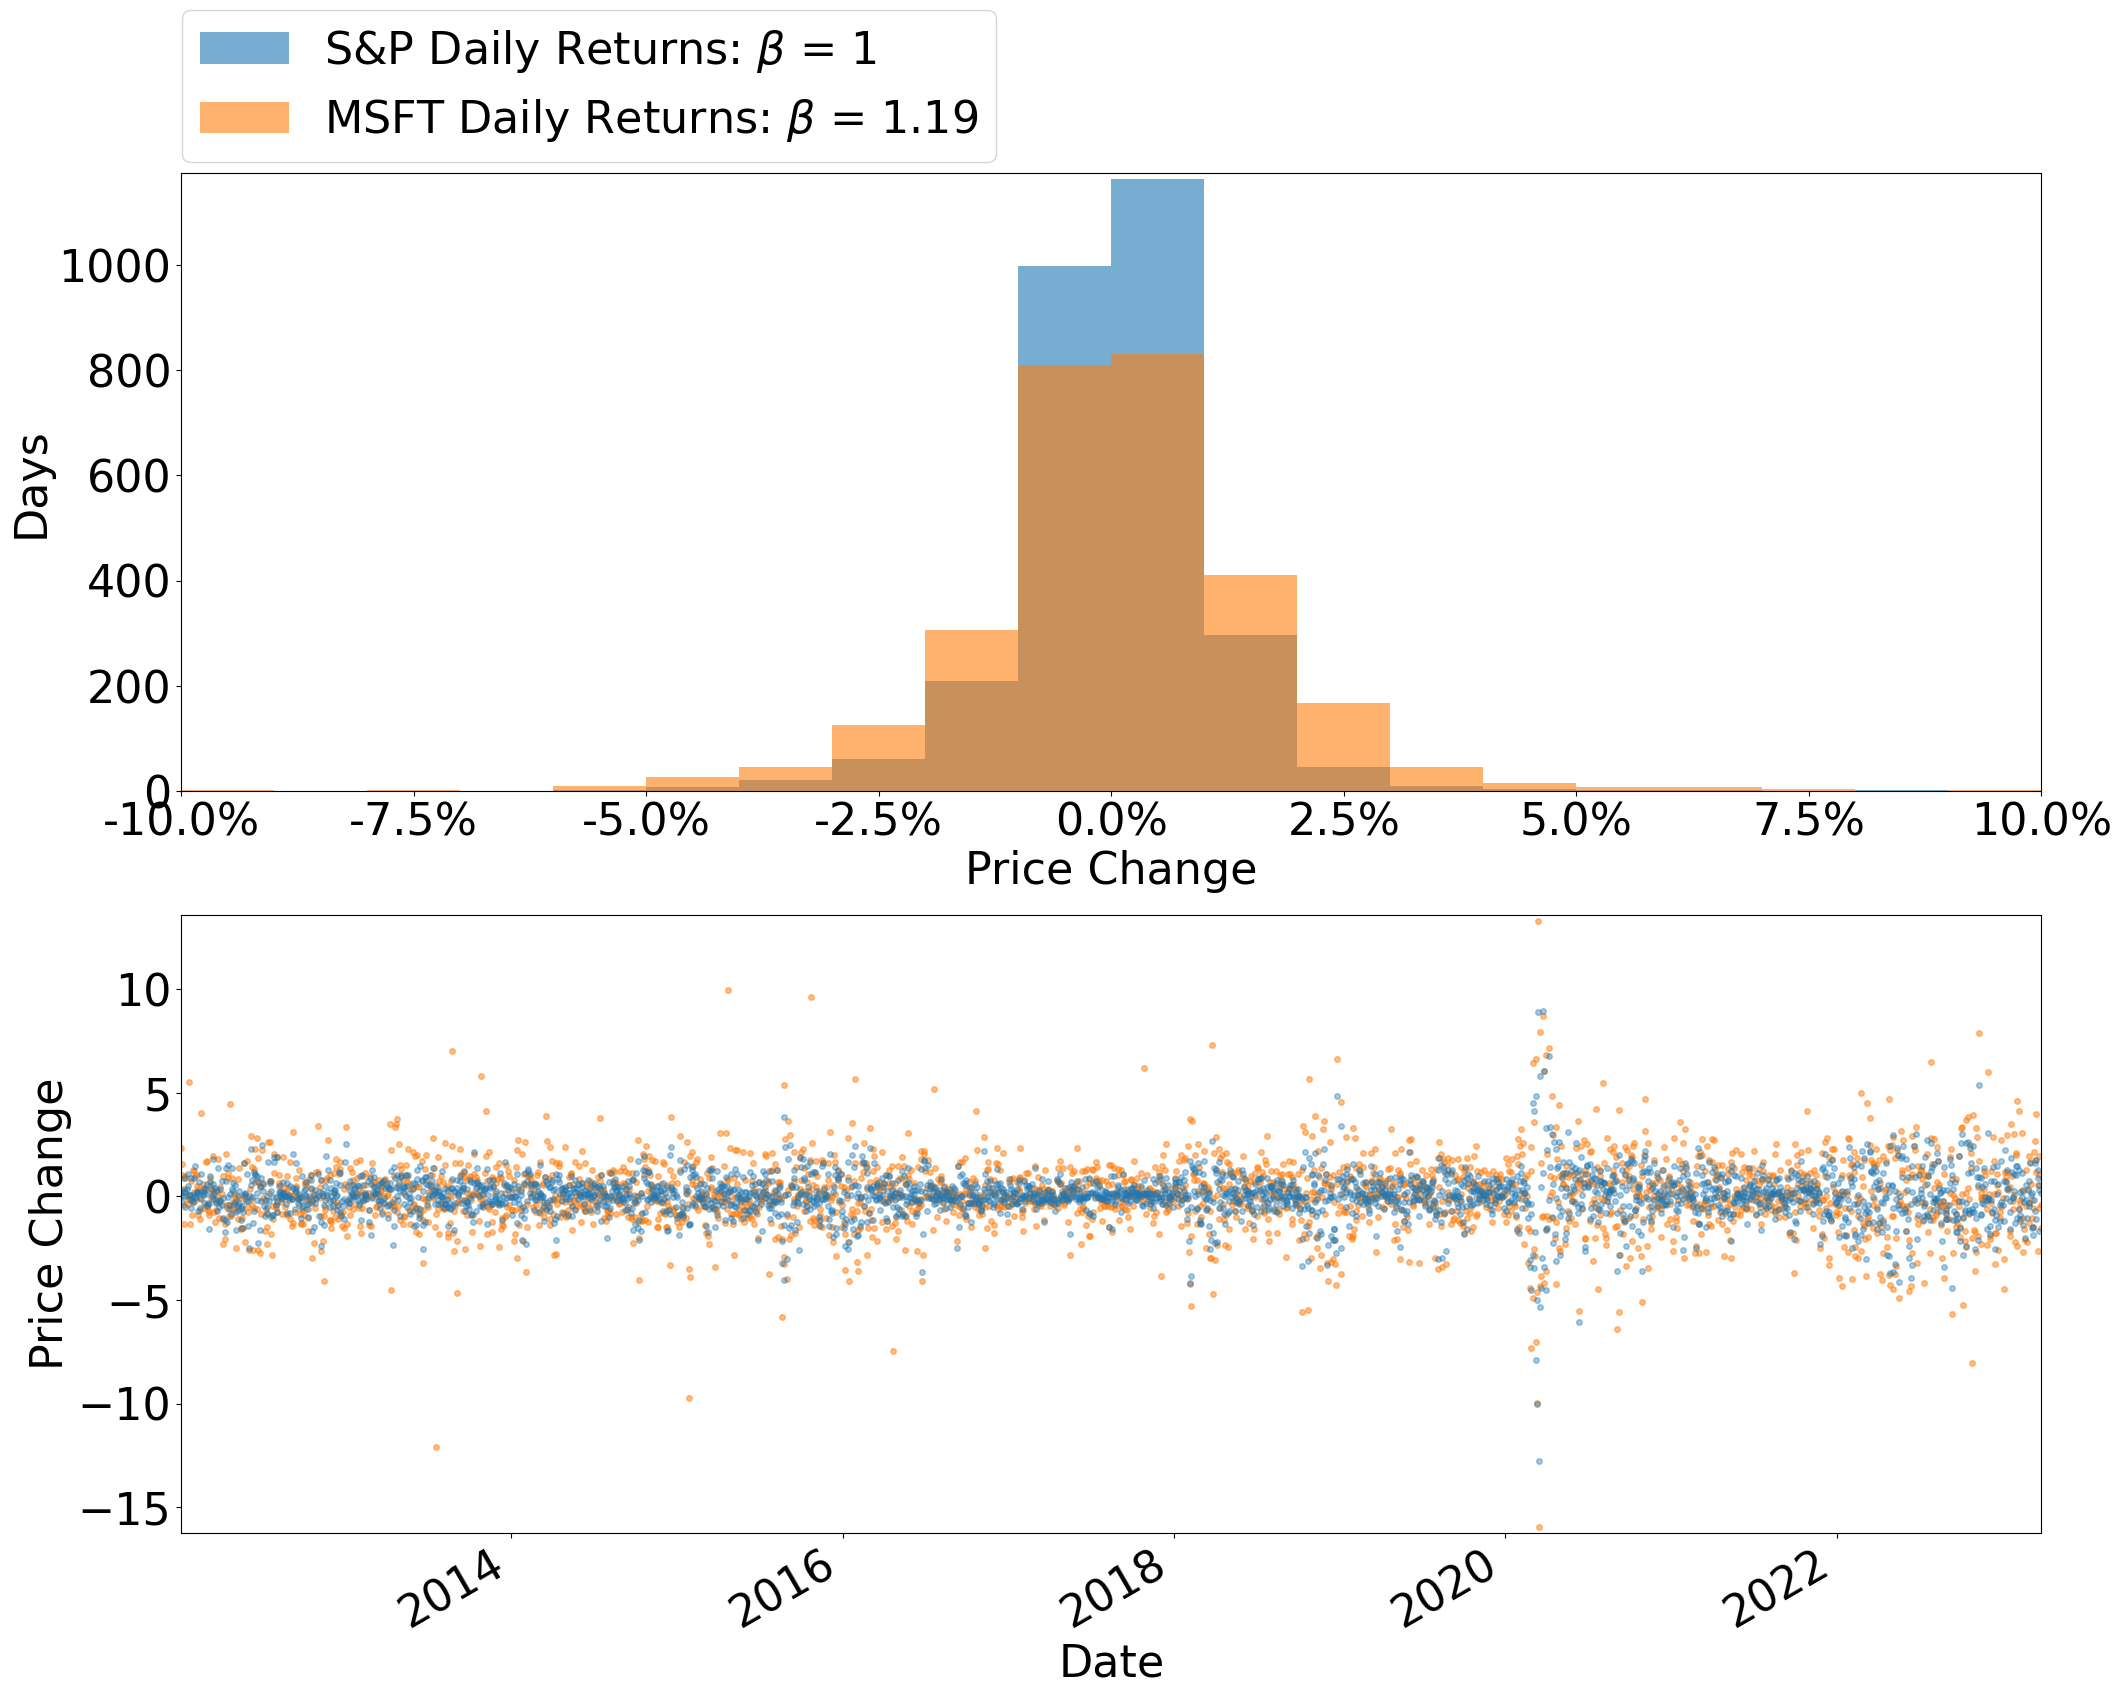

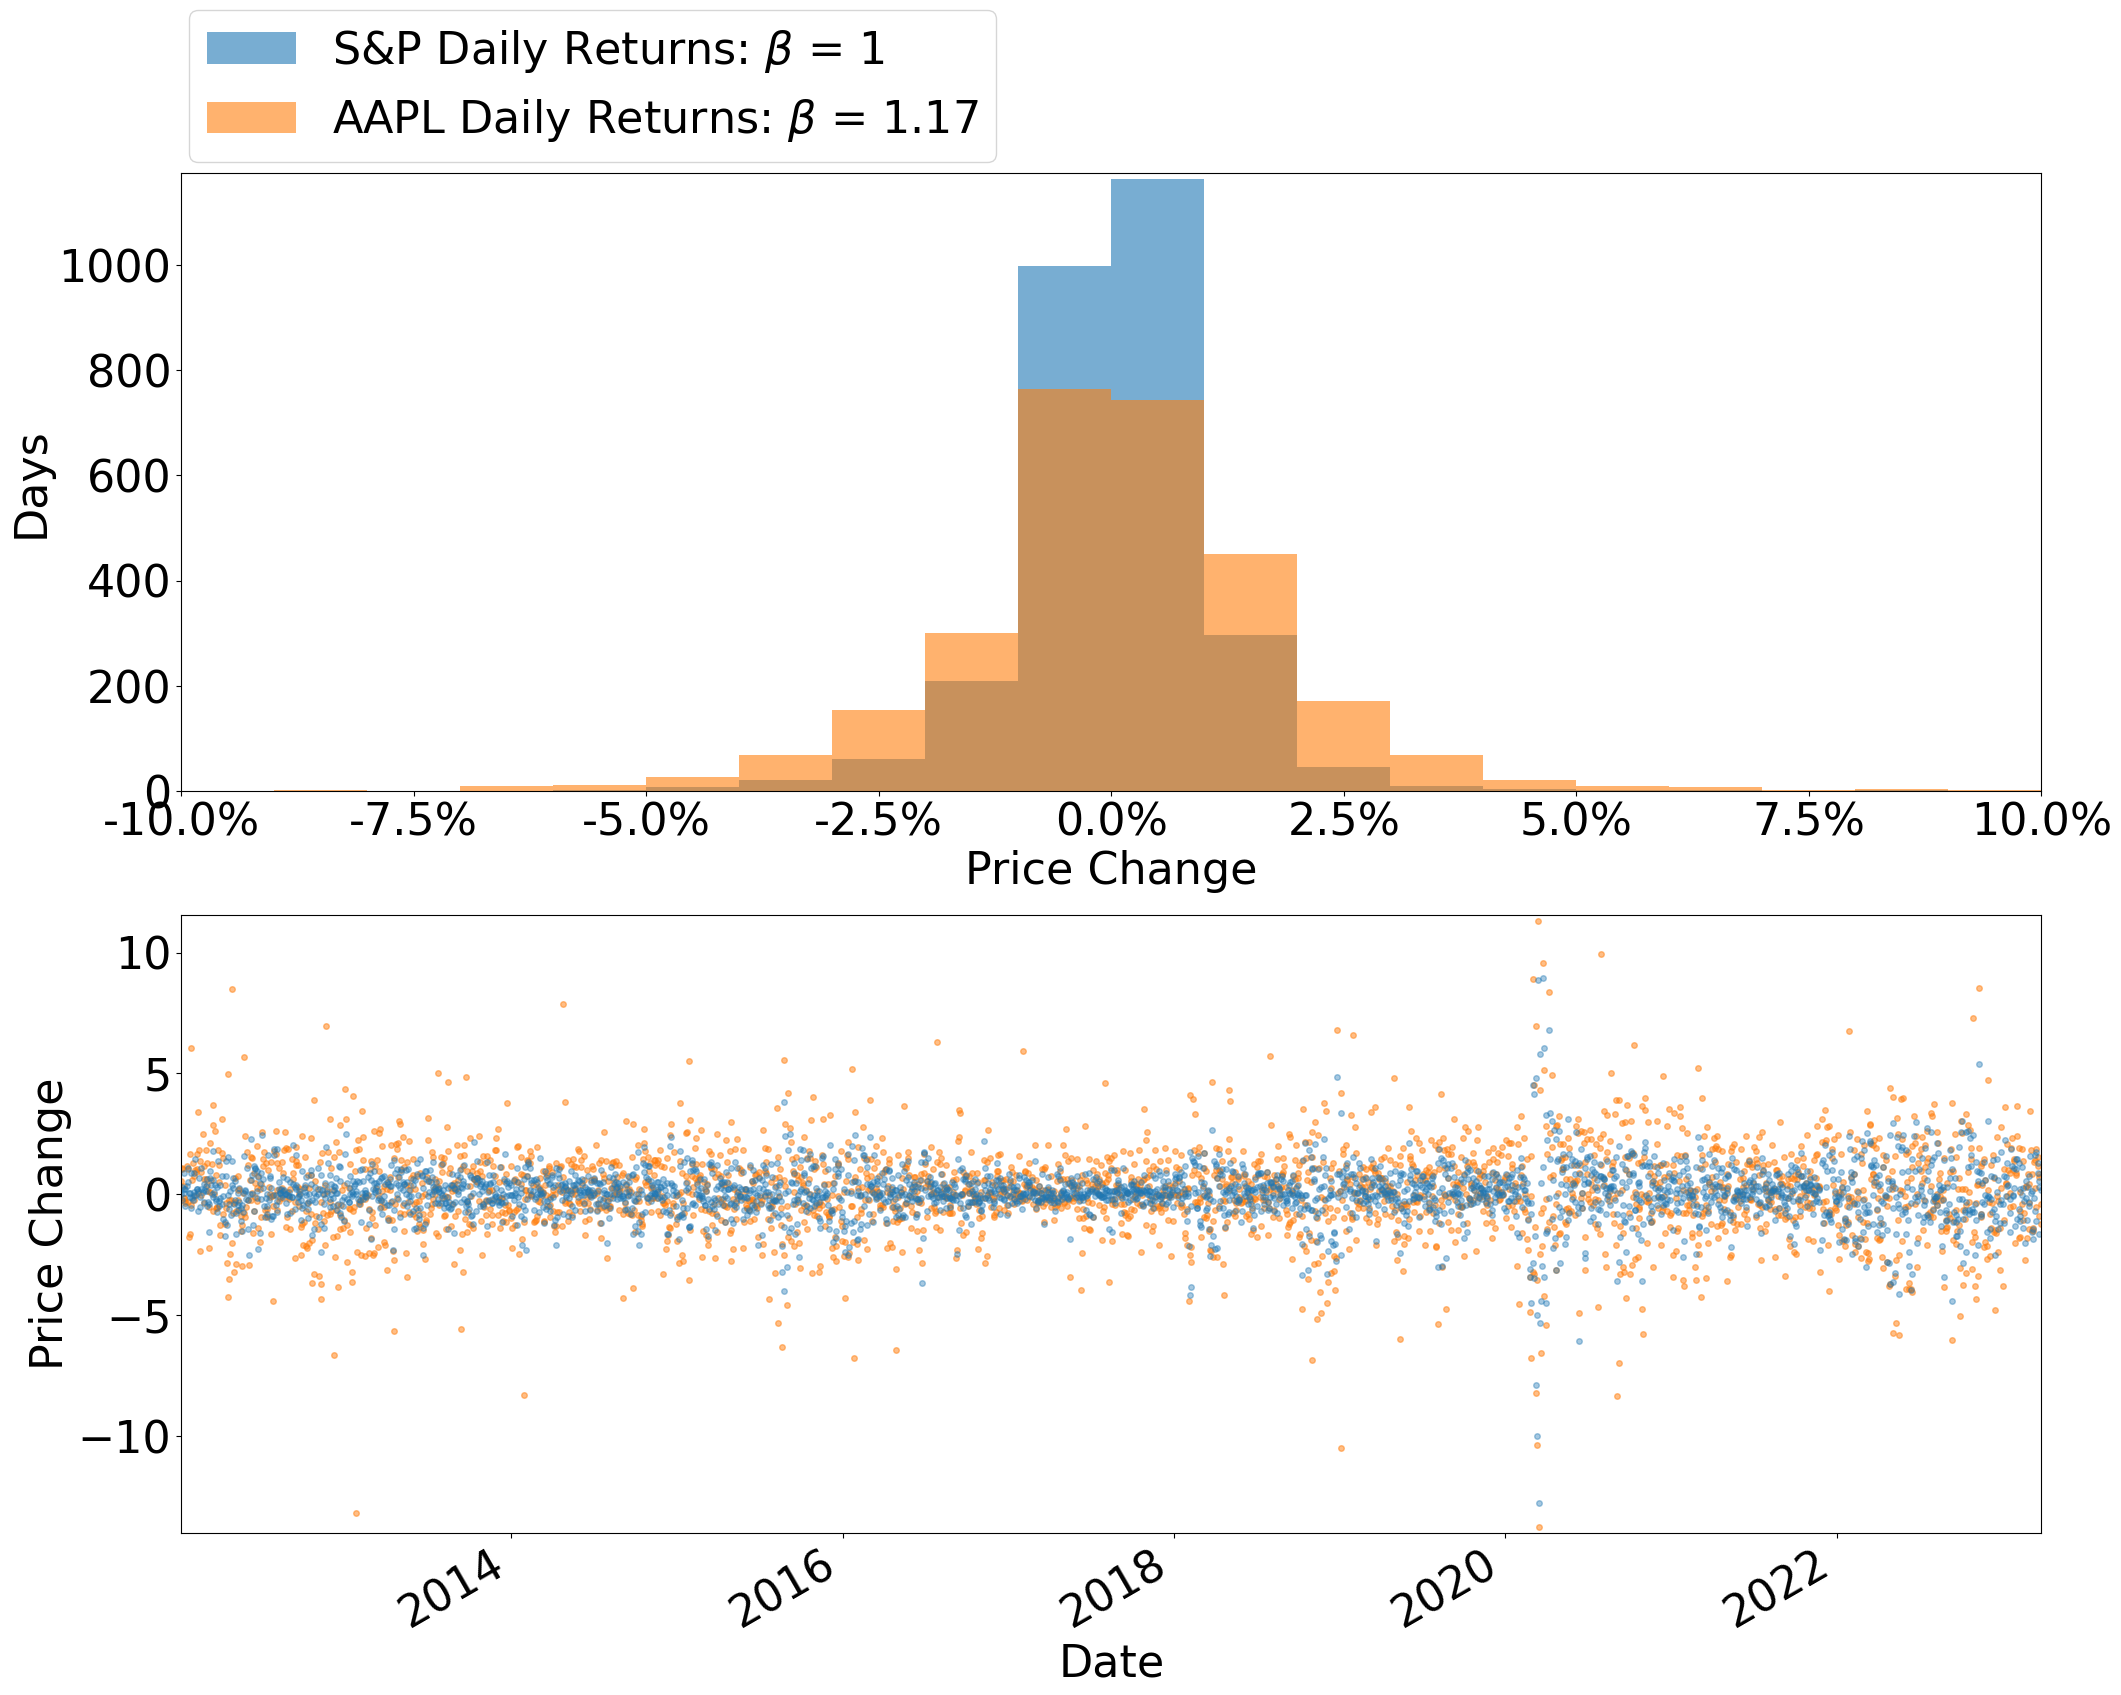

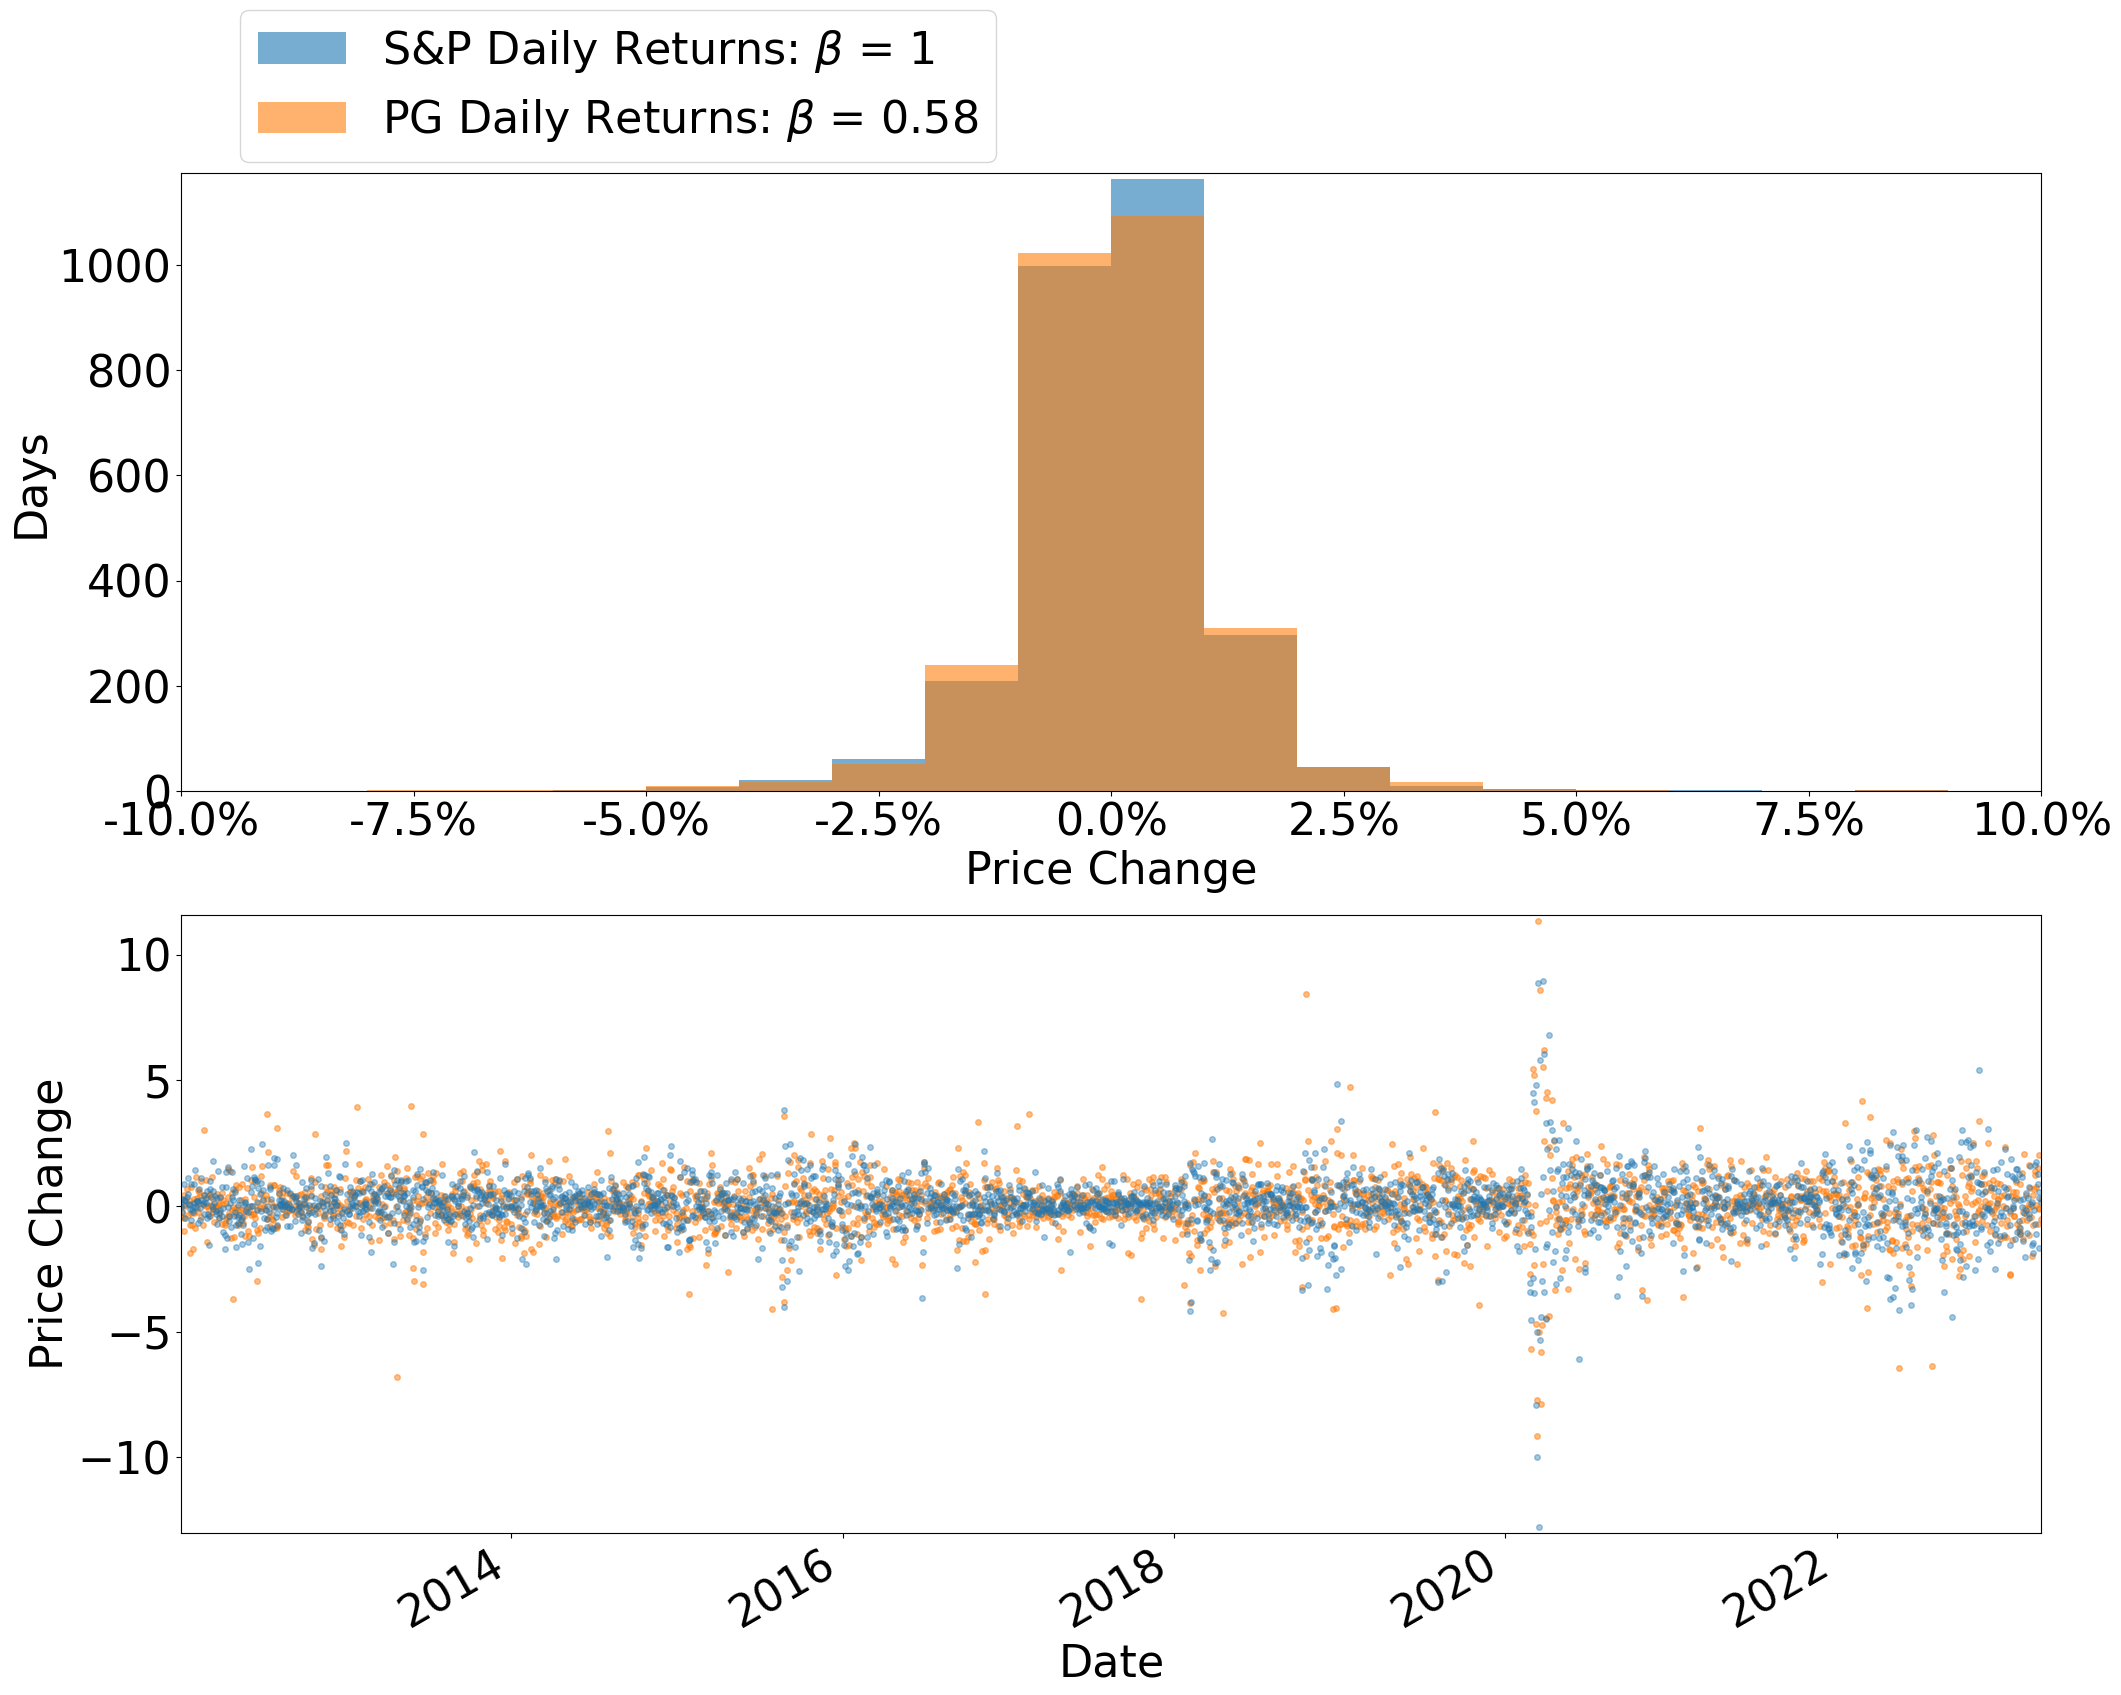

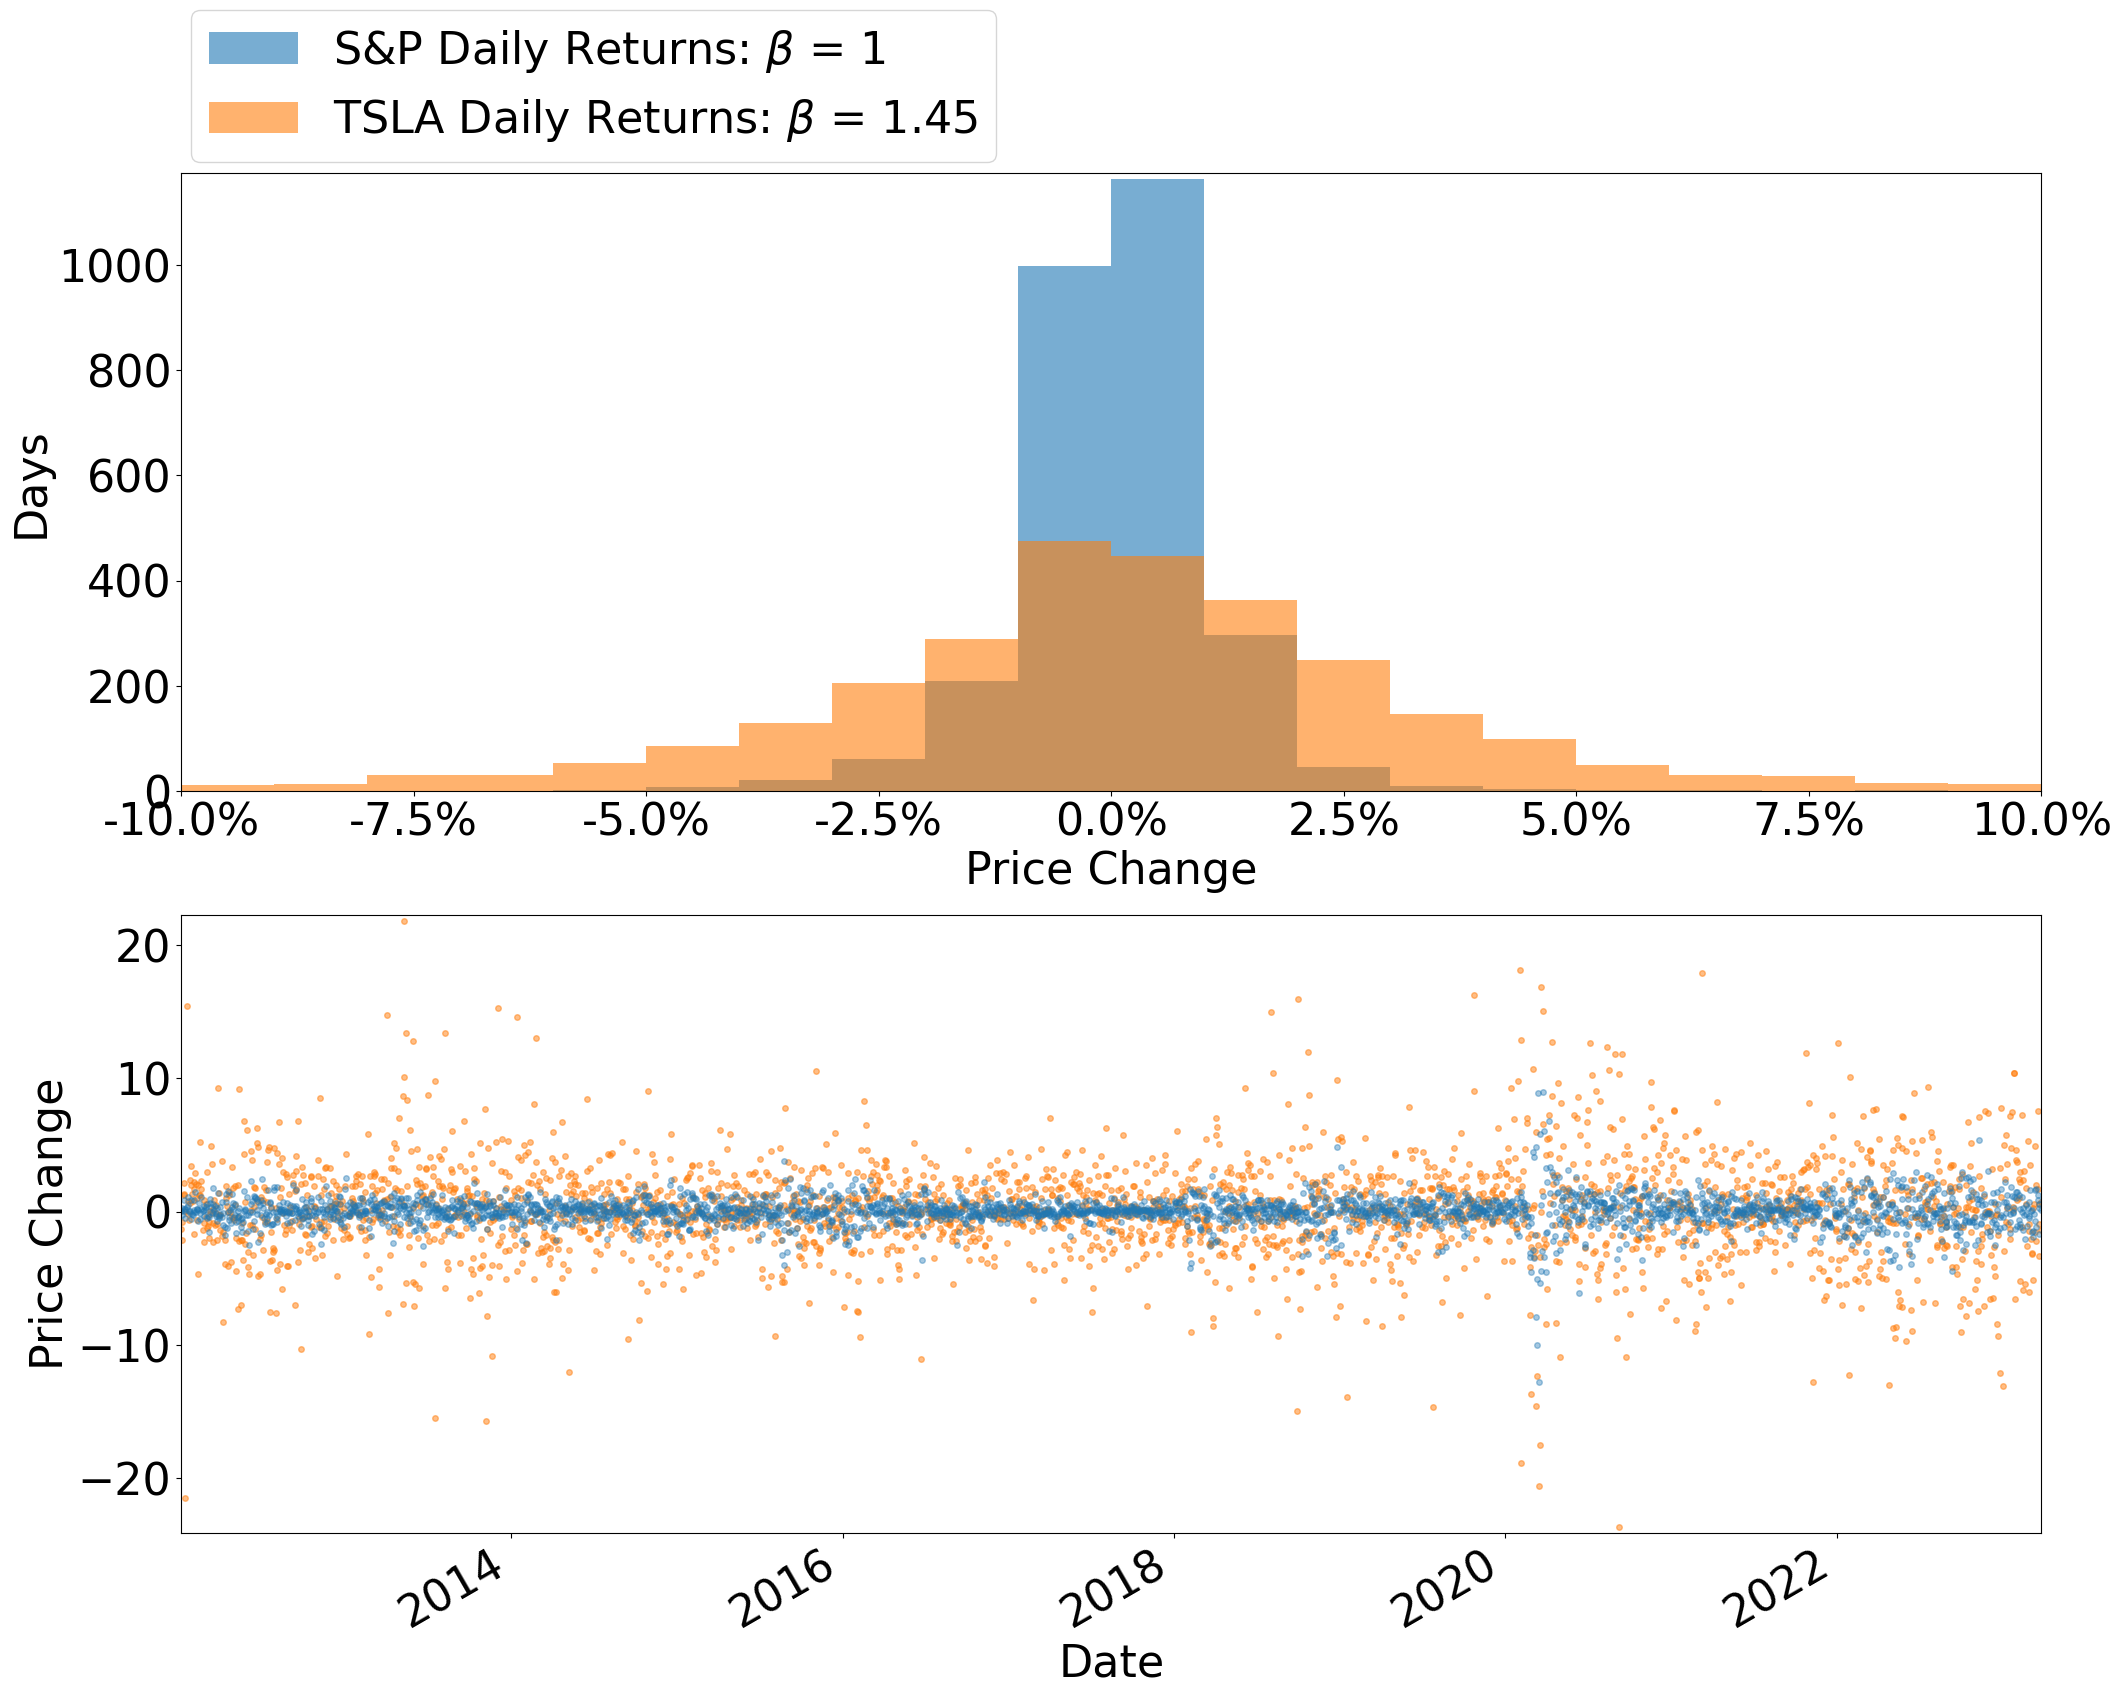

In [33]:
plot_data = price_change_data.mul(100)
for stock in stocks:
    fig, ax = plt.subplots(2, 1, figsize = (24,20))
    # plot the distribution of data for S&P alongside each stock
    plot_data["S&P 500"].hist(
        bins = [x for x in range(-10,11,1)],
        label = "S&P Daily Returns: $\\beta$ = " + str(1),
        ax = ax[0],
        density = False,
        alpha = 0.6)
    
    plot_data[stock].hist(
        bins = [x for x in range(-10,11,1)],
        label = stock + " Daily Returns: $\\beta$ = " + str(betas[stock].round(2)),
        ax = ax[0],
        density = False,
        alpha = 0.6)
    
    ax[0].legend(bbox_to_anchor = (0.45, 1.3))
    ax[0].set_ylabel("Days")
    ax[0].set_xlabel("Price Change")
    ax[0].set_xticklabels([str(x) + "%" for x in ax[0].get_xticks()])
    ax[0].grid(False)
    
    # plot a ts scatter of data for S&P alongside each stock
    plot_data[stock].plot(linestyle = "",
                                     marker = "o",
                                     alpha = 0.5,
                                     markersize = 4,
                                     color = "C1",
                                     ax = ax[1])
    plot_data["S&P 500"].plot(linestyle = "",
                                     marker = "o",
                                     alpha = 0.4,
                                     markersize = 4,
                                     color = "C0",
                                     ax = ax[1])
    ax[1].set_ylabel("Price Change")

In [37]:
n = 100
m = 1000

dist_avgs = {"Die Rolls": [],
            "Poisson": [],
            "Lognormal": []}
# build a sample of m sample means from distributions of length n
for i in range(m):
    dist_avgs["Die Rolls"].append(np.average(np.random.randint(1,7,n))) 
    dist_avgs["Poisson"].append(np.average(np.random.poisson(1, n)))
    dist_avgs["Lognormal"].append(np.average(np.random.lognormal(0, 1, n)))
    
# each columns is a sample of sample means    
dist_avgs = pd.DataFrame(dist_avgs)
dist_avgs

Die Rolls  Poisson  Lognormal
0         3.30     1.07   1.535073
1         3.52     0.99   1.949276
2         3.56     0.91   1.351087
3         3.35     1.01   1.658938
4         3.27     1.18   1.916605
..         ...      ...        ...
995       3.35     1.01   1.527929
996       3.49     1.07   1.777911
997       3.75     1.05   1.394529
998       3.21     1.03   1.783657
999       3.69     1.00   1.551462

[1000 rows x 3 columns]

Text(0.5, 1.0, 'Non-Centered Distributions')

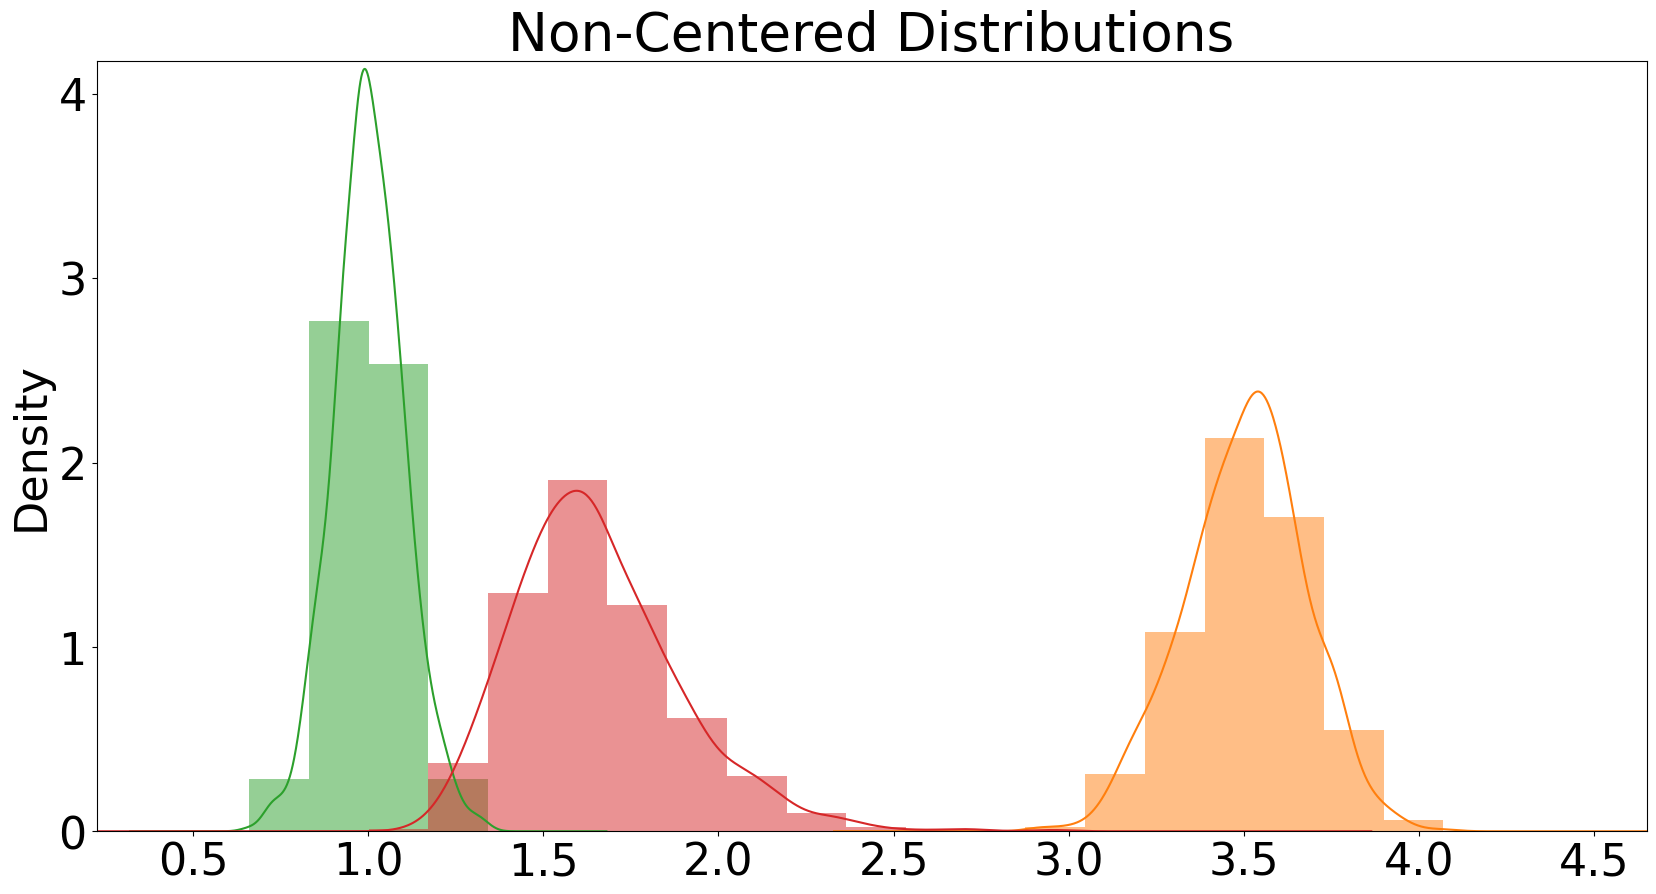

In [38]:
fig, ax = plt.subplots(figsize = (20, 10))
dist_avgs.plot.hist(density=True,
                    ax=ax,
                    bins=20,
                    color=["C1", "C2", "C3"],
                    alpha=.5,
                   legend = False)
dist_avgs.plot.kde(ax=ax, color=["C1", "C2", "C3"], legend=False)
ax.set_title("Non-Centered Distributions")

In [42]:
means_df = pd.DataFrame()
sd_df = pd.DataFrame()
for key in dist_avgs:
    ## Center Distributions
    # df that centers the distributions at zero by subtracting the mean value
    # from each sample mean
    means_df[key] = dist_avgs[key].sub(dist_avgs.mean()[key])
    ## Normalize Distributions
    # divide each obsevation by the distributions standard deviation
    sd_df[key] = means_df[key] / means_df.std()[key]
sd_df

Die Rolls   Poisson  Lognormal
0    -1.188641  0.668155  -0.503537
1     0.092410 -0.121043   1.245047
2     0.325329 -0.910241  -1.280242
3    -0.897493  0.076256   0.019368
4    -1.363330  1.753302   1.107124
..         ...       ...        ...
995  -0.897493  0.076256  -0.533695
996  -0.082278  0.668155   0.521618
997   1.431692  0.470855  -1.096848
998  -1.712708  0.273556   0.545877
999   1.082314 -0.022393  -0.434347

[1000 rows x 3 columns]

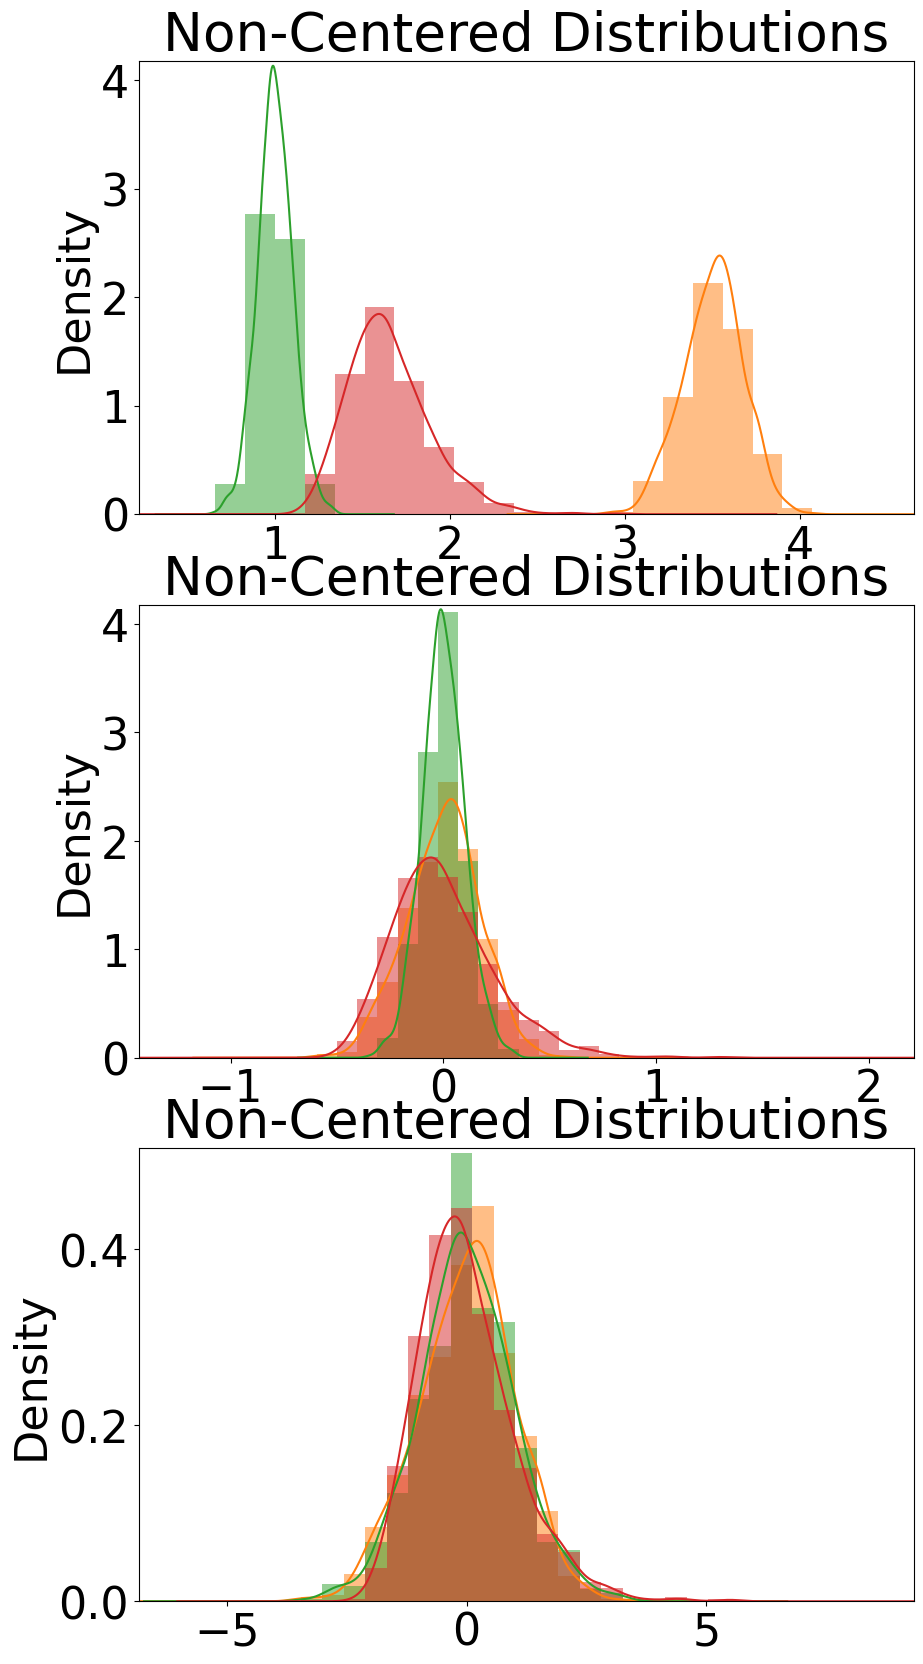

In [52]:
# save dfs in a single dictionary
df_dct = {"Non-Centered Distributions": dist_avgs,
         "Centered Distributions":means_df,
         "Centered Distributions Normalized by SD":sd_df}

# we will use the keys in the dictionary to call each df
keys = list(df_dct.keys())
# automatically count number of keys in dictionary
num_figs = len(keys)
fig, axs = plt.subplots(num_figs, figsize=(10, 20))

# using a for loop with a dictionary of dfs will allow us to
# automate the creation of a multiplot
# cycle through each index value in the list of keys
for i in range(num_figs):
    # define the key by the index value
    key = keys[i]
    # select ax by index value
    ax = axs[i]
    # select dataframe that is linked to key
    plot_df = df_dct[key]
    # count the number of columns in the data frame
    # this is number of distribution
    num_samples = len(plot_df.keys())
    # each distribution will be assignment its own color
    colors = ["C" + str(c + 1) for c in range(num_samples)]
    # first, plot the dataframe containing the distributions of the random sample means 
    plot_df.plot.hist(density = True,
                        ax = ax,
                        bins = 20,
                        color = colors,
                        alpha = .5,
                       legend = False)
    # fit a distribution curve on the relevant data
    plot_df.plot.kde(ax = ax, color = ["C1", "C2", "C3"], legend = False)
    ax.set_title("Non-Centered Distributions")

## Simulation

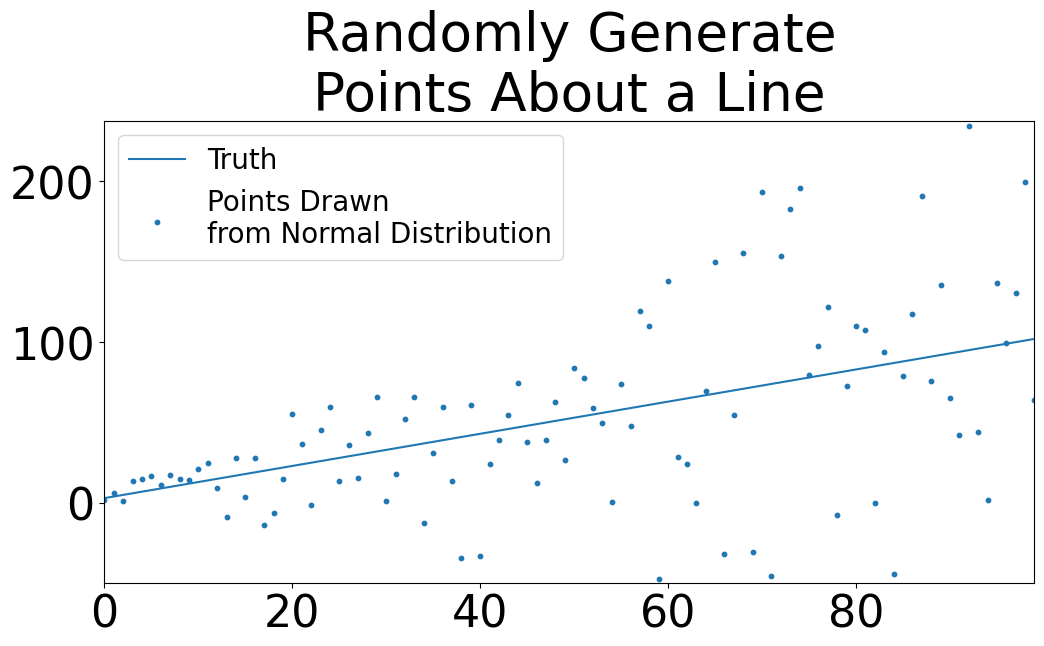

In [59]:
import random
line = np.array([i + 3  for i in range(100)])
points = []
# generate random points using the values from line
# as mean and standard deviation
for point in line:
    # random.normalvariate(mu = mean, sigma = SD)
    points.append(random.normalvariate(mu = point,
                                       sigma = point))
figure = plt.figure(figsize = (12,6))
plt.plot(line, label = "Truth")
plt.scatter(np.arange(len(points)),
            points,
            label = "Points Drawn\nfrom Normal Distribution",
            s = 10)
plt.title("Randomly Generate\nPoints About a Line")
plt.legend(loc = "best", fontsize = 20)
plt.show()

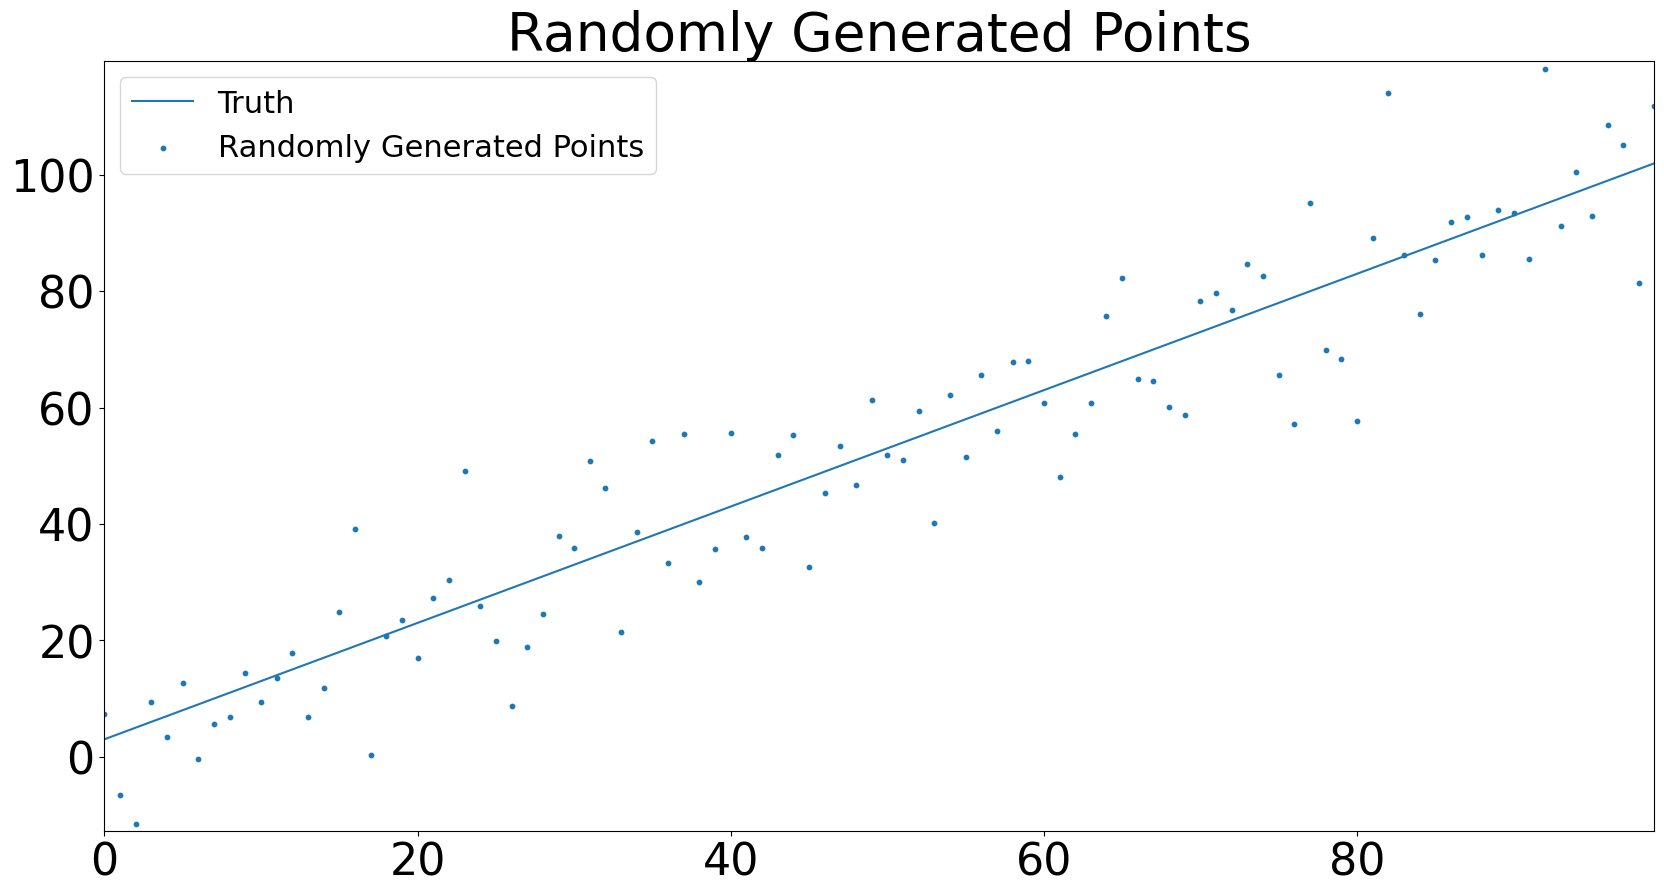

In [66]:
def build_random_data_with_line(y_int, slope, SD = 1):
    line = np.array([slope * (i) + y_int for i in range(100)])
    points = []
    for point in line:
        points.append(random.normalvariate(point, SD))
    return line, points
def plot_line(line, points, line_name = "Truth",
             title = "Randomly Generated Points"):
    figure = plt.figure(figsize = (20,10))
    plt.plot(line, label = line_name)
    plt.scatter(np.arange(len(points)), points, s = 10,
               label = title)
    plt.title(title)
    plt.legend(loc = "best", fontsize = 22)
    plt.show()    
line, points = build_random_data_with_line(y_int = 3, slope = 1, SD = 10)
plot_line(line, points)

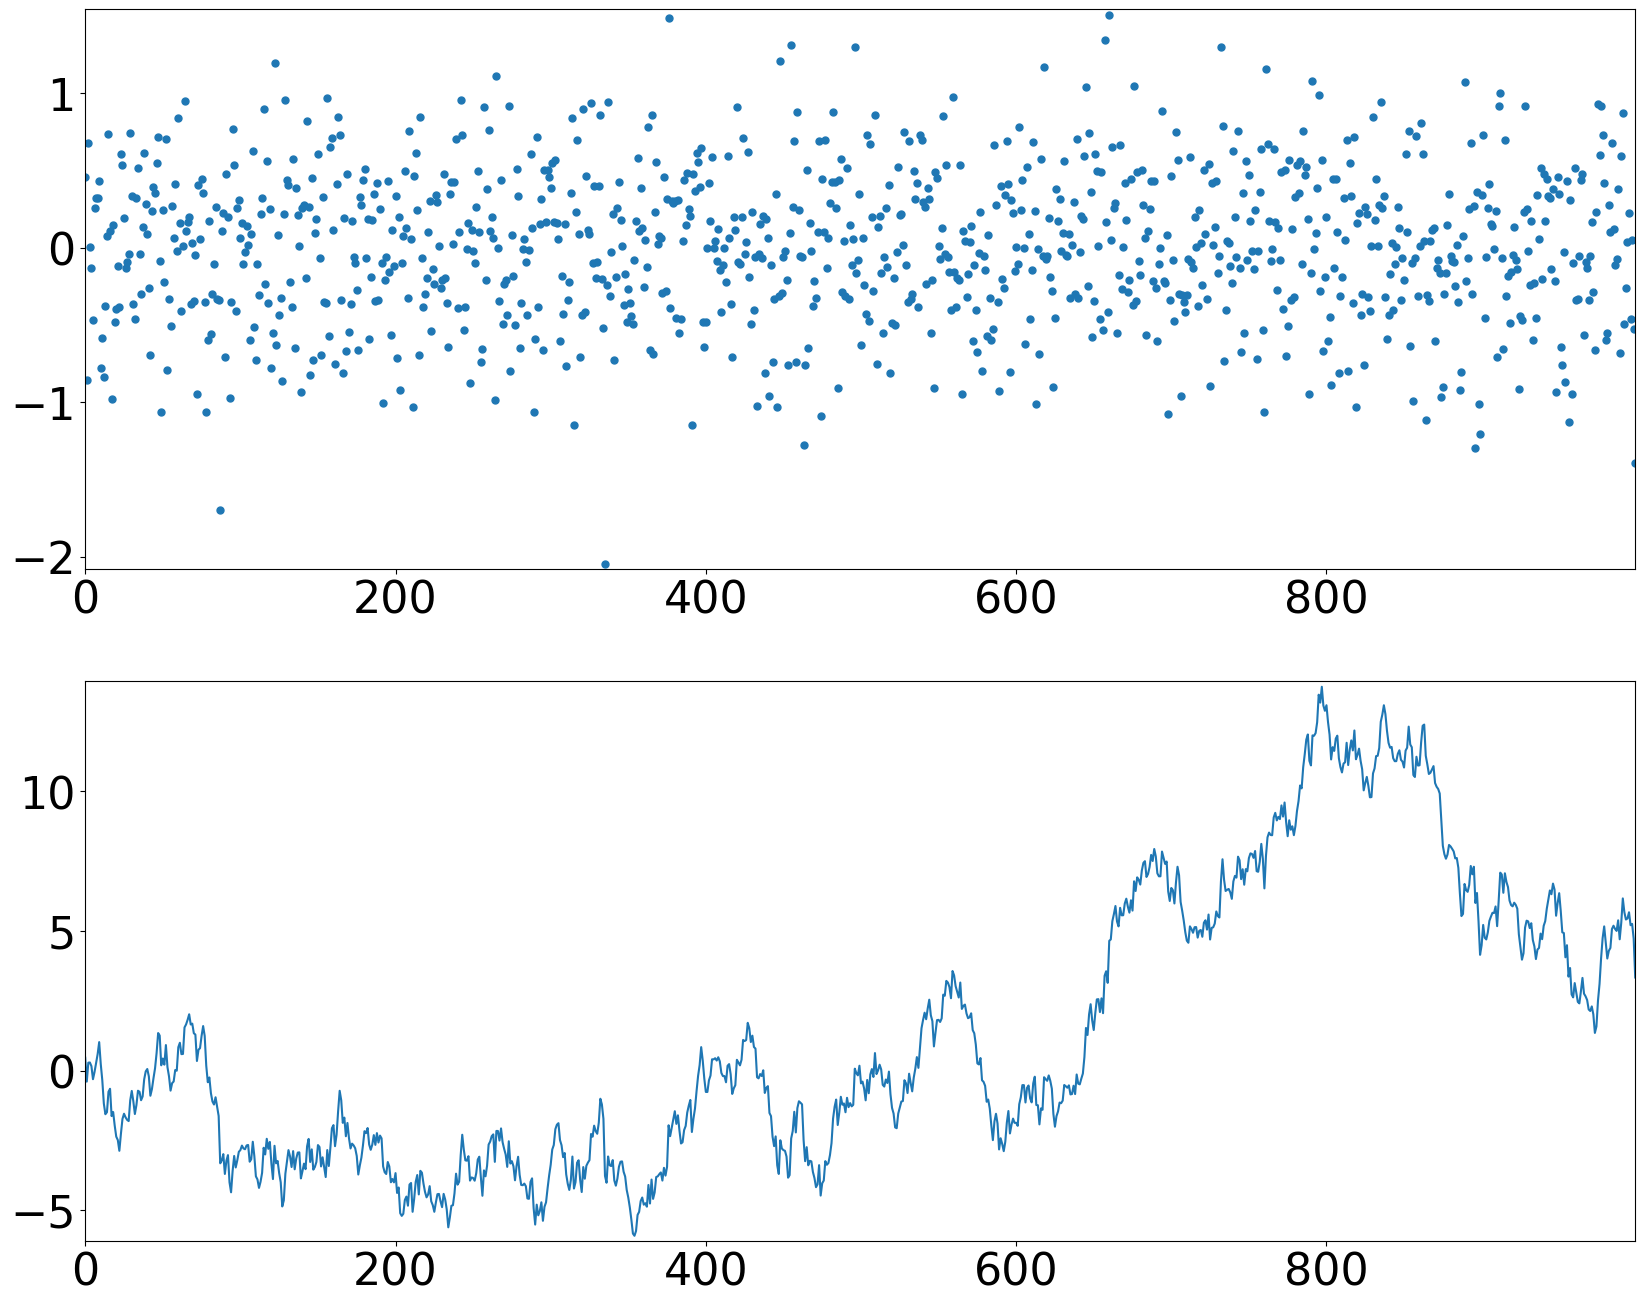

In [73]:
# single simulation

random_list = [random.normalvariate(0, 0.5) for i in range (1000)]
fig, axs = plt.subplots(2, figsize = (20, 16))
axs[0].plot(random_list, ls = "", marker = ".", markersize = 10)

simulation = []
for i in range(len(random_list)):
    val = random_list[i]
    if i == 0:
        simulation.append(val)
    else:
        # add last value observed in simulation + change (which is val)
        # this will generate the latest value in the simulation
        simulation.append(simulation[-1] + val)
axs[1].plot(simulation)
plt.show()
plt.close()